<a href="https://colab.research.google.com/github/mangatayaru/Classification_Project-Mobile_Price_Range_Prediction/blob/main/Classification_Project_Mobile_Price_Range_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Team Member 1 - Javvadi L N S S Mangatayaru**


# **Project Summary -**

In competitive mobile phone market, the companies want to understand sales data of mobile and find the factors that drives the prices of mobiles. In this mobile price prediction dataset, it consists of different features of mobile and price. The data contains information regarding mobile phone features, specifications etc and their price range. The various features and information can be used to predict the price range of a mobile phone. This is multiclassification problem where the price range is between 0 to 3. Firstly the data is cleaned. Secondly, EDA analysis is done to find which factors effect the price of the mobile. After that, in order to make the data ready for machine learning, skewness is verified and transformation is applied everywhere needed to make the data normally distributed. Outliers are found and removed if needed. If these treatments are not applied it results in wrong predictions. The data is scaled equally over all the columns using the different scaling techniques like Standard Scalar, MinmaxScalar etc. Now data is splitted into train and test data with certain ratio and random state. The data is modelled using train data and prediction is done on test data. The different evaluation metrics are applied to check the accuracy of the model and results are compared to find the best model for this mobile price range prediction.

# **GitHub Link -**

https://github.com/mangatayaru/Classification_Project-Mobile_Price_Range_Prediction

# **Problem Statement**


The objective is to find the relation between features of mobile and it's selling price.

# ***Let's Begin !***

## ***Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries

In [ ]:
import numpy as np
import pandas as pd
from numpy import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
# Load Dataset

In [ ]:
dataset=pd.read_csv('/content/data_mobile_price_range.csv')

### Dataset First View

In [ ]:
# Dataset First Look

In [ ]:
dataset.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count

In [ ]:
dataset.shape

(2000, 21)

There are 2000 rows and 21 columns in the mobile price prediction dataset.

### Dataset Information

In [ ]:
# Dataset Info

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count

In [ ]:
len(dataset[dataset.duplicated()])

0

There are no duplictae rows in the mobile price prediction dataset.

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count

In [ ]:
dataset.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [ ]:
# Visualizing the missing values

In [ ]:
dataset.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

There are no nulls and missing values in the dataset.

### What did you know about your dataset?

In this mobile price prediction dataset, it consists of different features of mobile and price.

## ***Understanding Your Variables***

In [ ]:
# Dataset Columns

In [ ]:
dataset.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [ ]:
# Dataset Describe

In [ ]:
dataset.describe(include="all")

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


### Variables Description

**Fields Description:**

Battery-power : Battery capacity in mAh

Blue : Has bluetooth or not

Clock speed : speed at which microprocessor executes instructions

Dual_sim : Has dual sim support or not

Fc : Front Camera megapixels

Four_g : Has 4G or not

Int memory : Internal memory capacity

M_dep : Mobile depth in cm

Mobile_wt : Weight of mobiles phone

N_cores : Number of cores in processor

Pc : Primary Camera mega pixels

Px_height : Pixel resolution height

Px_width : Pixel resolution width

Ram : Random Access Memory in MB

Sc_h : Screen Height

Sc_w : Screen width

Talk time : Longest that a single battery can last
over a call

Three_g : Has 3g or not

Wifi : Has wifi or not

Price_range : This is the target variable with a value of 0(low cost) 1 (medium cost), 2 (high cost) 3(very high cost)

In [ ]:
dataset.rename(columns={'blue':'Bluetooth','fc':'Front Camera(MP)','pc':"Primary camera(MP)", 'sc_h':'Screen_height','sc_w':'Screen_width'},inplace=True)

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.

In [ ]:
dataset['battery_power'].unique()

array([ 842, 1021,  563, ..., 1139, 1467,  858])

In [ ]:
dataset['Bluetooth'].unique()

array([0, 1])

In [ ]:
dataset['clock_speed'].unique()

array([2.2, 0.5, 2.5, 1.2, 1.7, 0.6, 2.9, 2.8, 2.1, 1. , 0.9, 1.1, 2.6,
       1.4, 1.6, 2.7, 1.3, 2.3, 2. , 1.8, 3. , 1.5, 1.9, 2.4, 0.8, 0.7])

In [ ]:
dataset['dual_sim'].unique()

array([0, 1])

In [ ]:
dataset['Front Camera(MP)'].unique()

array([ 1,  0,  2, 13,  3,  4,  5,  7, 11, 12, 16,  6, 15,  8,  9, 10, 18,
       17, 14, 19])

In [ ]:
dataset['four_g'].unique()

array([0, 1])

In [ ]:
dataset['int_memory'].unique()

array([ 7, 53, 41, 10, 44, 22, 24,  9, 33, 17, 52, 46, 13, 23, 49, 19, 39,
       47, 38,  8, 57, 51, 21,  5, 60, 61,  6, 11, 50, 34, 20, 27, 42, 40,
       64, 14, 63, 43, 16, 48, 12, 55, 36, 30, 45, 29, 58, 25,  3, 54, 15,
       37, 31, 32,  4, 18,  2, 56, 26, 35, 59, 28, 62])

In [ ]:
dataset['m_dep'].unique()

array([0.6, 0.7, 0.9, 0.8, 0.1, 0.5, 1. , 0.3, 0.4, 0.2])

In [ ]:
dataset['mobile_wt'].unique()

array([188, 136, 145, 131, 141, 164, 139, 187, 174,  93, 182, 177, 159,
       198, 185, 196, 121, 101,  81, 156, 199, 114, 111, 132, 143,  96,
       200,  88, 150, 107, 100, 157, 160, 119,  87, 152, 166, 110, 118,
       162, 127, 109, 102, 104, 148, 180, 128, 134, 144, 168, 155, 165,
        80, 138, 142,  90, 197, 172, 116,  85, 163, 178, 171, 103,  83,
       140, 194, 146, 192, 106, 135, 153,  89,  82, 130, 189, 181,  99,
       184, 195, 108, 133, 179, 147, 137, 190, 176,  84,  97, 124, 183,
       113,  92,  95, 151, 117,  94, 173, 105, 115,  91, 112, 123, 129,
       154, 191, 175,  86,  98, 125, 126, 158, 170, 161, 193, 169, 120,
       149, 186, 122, 167])

In [ ]:
dataset['n_cores'].unique()

array([2, 3, 5, 6, 1, 8, 4, 7])

In [ ]:
dataset['Primary camera(MP)'].unique()

array([ 2,  6,  9, 14,  7, 10,  0, 15,  1, 18, 17, 11, 16,  4, 20, 13,  3,
       19,  8,  5, 12])

In [ ]:
dataset['px_height'].unique()

array([  20,  905, 1263, ...,  528,  915,  483])

In [ ]:
dataset['px_width'].unique()

array([ 756, 1988, 1716, ...,  743, 1890, 1632])

In [ ]:
dataset['ram'].unique()

array([2549, 2631, 2603, ..., 2032, 3057, 3919])

In [ ]:
dataset['Screen_height'].unique()

array([ 9, 17, 11, 16,  8, 13, 19,  5, 14, 18,  7, 10, 12,  6, 15])

In [ ]:
dataset['Screen_width'].unique()

array([ 7,  3,  2,  8,  1, 10,  9,  0, 15, 13,  5, 11,  4, 12,  6, 17, 14,
       16, 18])

In [ ]:
dataset['talk_time'].unique()

array([19,  7,  9, 11, 15, 10, 18,  5, 20, 12, 13,  2,  4,  3, 16,  6, 14,
       17,  8])

In [ ]:
dataset['three_g'].unique()

array([0, 1])

In [ ]:
dataset['touch_screen'].unique()

array([0, 1])

In [ ]:
dataset['wifi'].unique()

array([1, 0])

In [ ]:
dataset['price_range'].unique()

array([1, 2, 3, 0])

In [ ]:
dataset["Price_Range"]=dataset["price_range"]

In [ ]:
dataset["Price_Range"][dataset["Price_Range"]==0]="Low_cost"
dataset["Price_Range"][dataset["Price_Range"]==1]="Medium_cost"
dataset["Price_Range"][dataset["Price_Range"]==2]="High_cost"
dataset["Price_Range"][dataset["Price_Range"]==3]="Veryhigh_cost"

In [ ]:
dataset["Screen_diagonal"]=np.sqrt((dataset["Screen_width"]**2)+(dataset["Screen_height"]**2))

In [ ]:
dataset["Screen_diagonal"].unique()

array([11.40175425, 17.2626765 , 11.18033989, 17.88854382,  8.24621125,
       17.02938637, 15.26433752, 16.2788206 , 21.47091055,  5.38516481,
       16.64331698, 18.        ,  7.07106781, 22.6715681 , 13.45362405,
       10.19803903, 23.02172887, 11.04536102, 12.08304597, 10.63014581,
       11.        , 20.1246118 , 16.03121954, 18.78829423, 10.04987562,
       13.89244399, 20.24845673,  5.09901951, 18.68154169,  7.        ,
       12.04159458, 10.77032961, 14.76482306,  7.81024968,  6.08276253,
       21.63330765, 18.11077028, 20.59126028, 15.        , 19.20937271,
        9.48683298,  8.54400375, 20.        , 15.29705854, 20.61552813,
        5.        , 22.47220505, 13.        ,  6.        , 15.65247584,
       17.80449381,  9.8488578 ,  8.60232527, 19.84943324, 14.56021978,
       16.15549442, 14.14213562, 19.6977156 , 19.41648784,  9.21954446,
        6.40312424, 12.20655562, 13.03840481, 21.40093456, 10.81665383,
       10.44030651, 17.49285568, 16.        , 13.34166406, 10.29

New column "Screen diagonal" is added to the dataset which determines the size of the mobile phone.

## ***Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [ ]:
# Chart - 1 visualization code

1. Find whether the dataset is balanced or not?

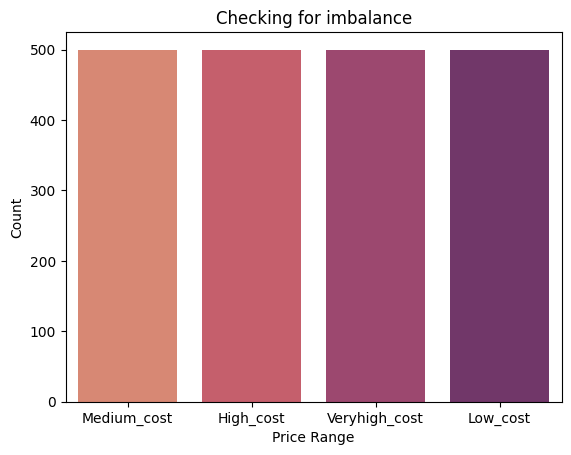

In [ ]:
sns.countplot(data=dataset,x="Price_Range",palette="flare")
plt.xlabel("Price Range")
plt.ylabel("Count")
plt.title("Checking for imbalance")
plt.show()

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The dataset has 4 classes(Low,Medium,High,Veryhigh) and all are fully balanced.

#### Chart - 2

In [ ]:
# Chart - 2 visualization code

##### 2. To check the bluetooth influence on price range?

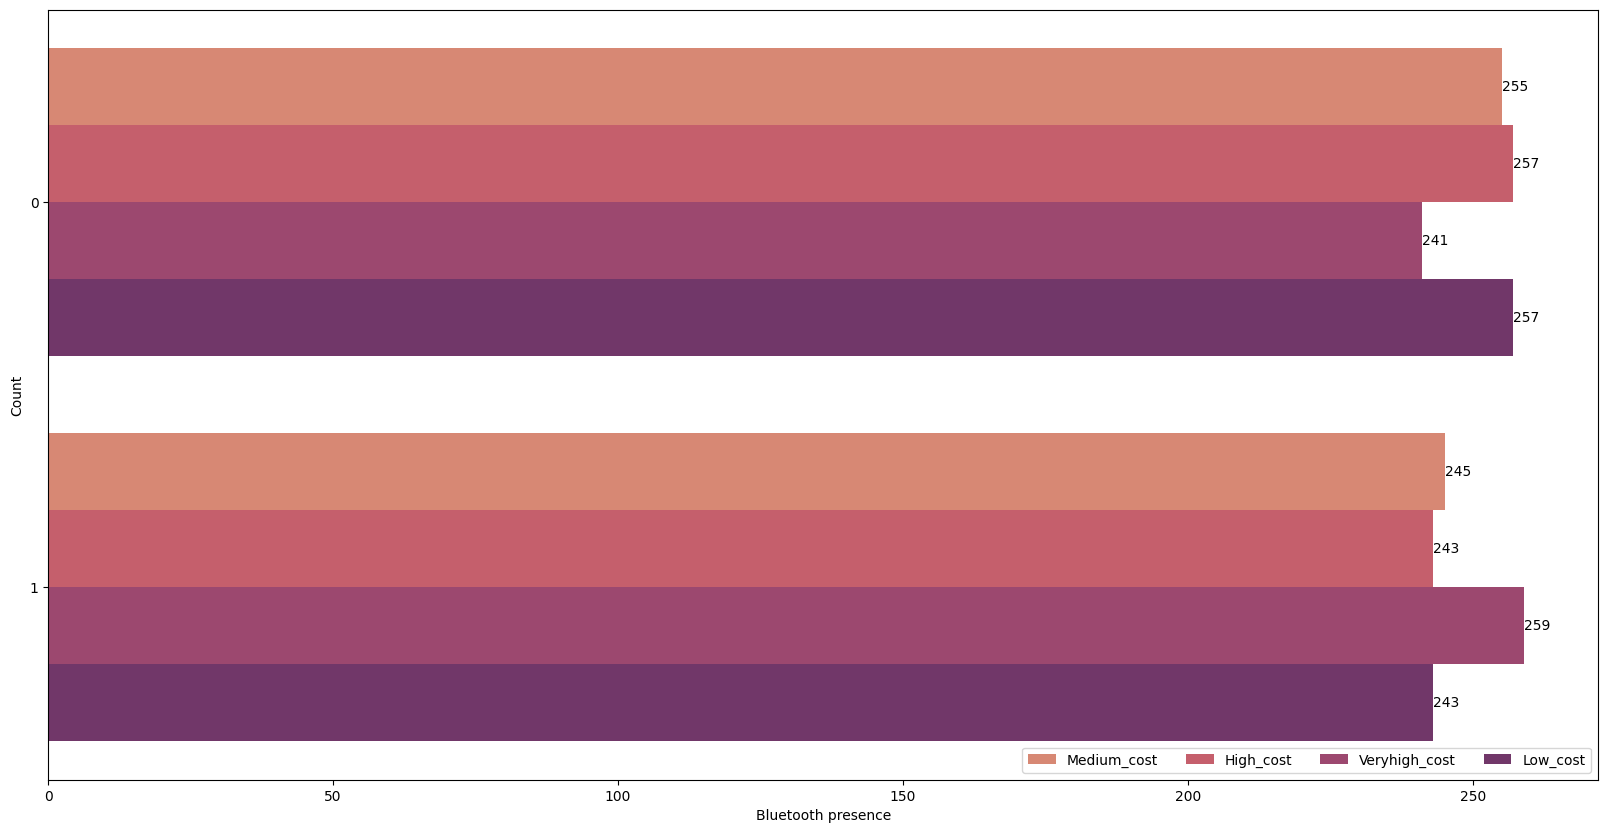

In [ ]:
plt.figure(figsize=(20,10))
ax=sns.countplot(data=dataset,y="Bluetooth",orient="h",hue="Price_Range",palette="flare")
plt.xlabel("Bluetooth presence")
plt.ylabel("Count")
for i in ax.containers:
  ax.bar_label(i,)
ax.legend(ncol=4, loc="lower right", frameon=True)
plt.show()

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Bluetooth will not drive the price of mobile.

#### Chart - 3

In [ ]:
# Chart - 3 visualization code

3. To find whether there is influence of Front Camera(MP) on price?

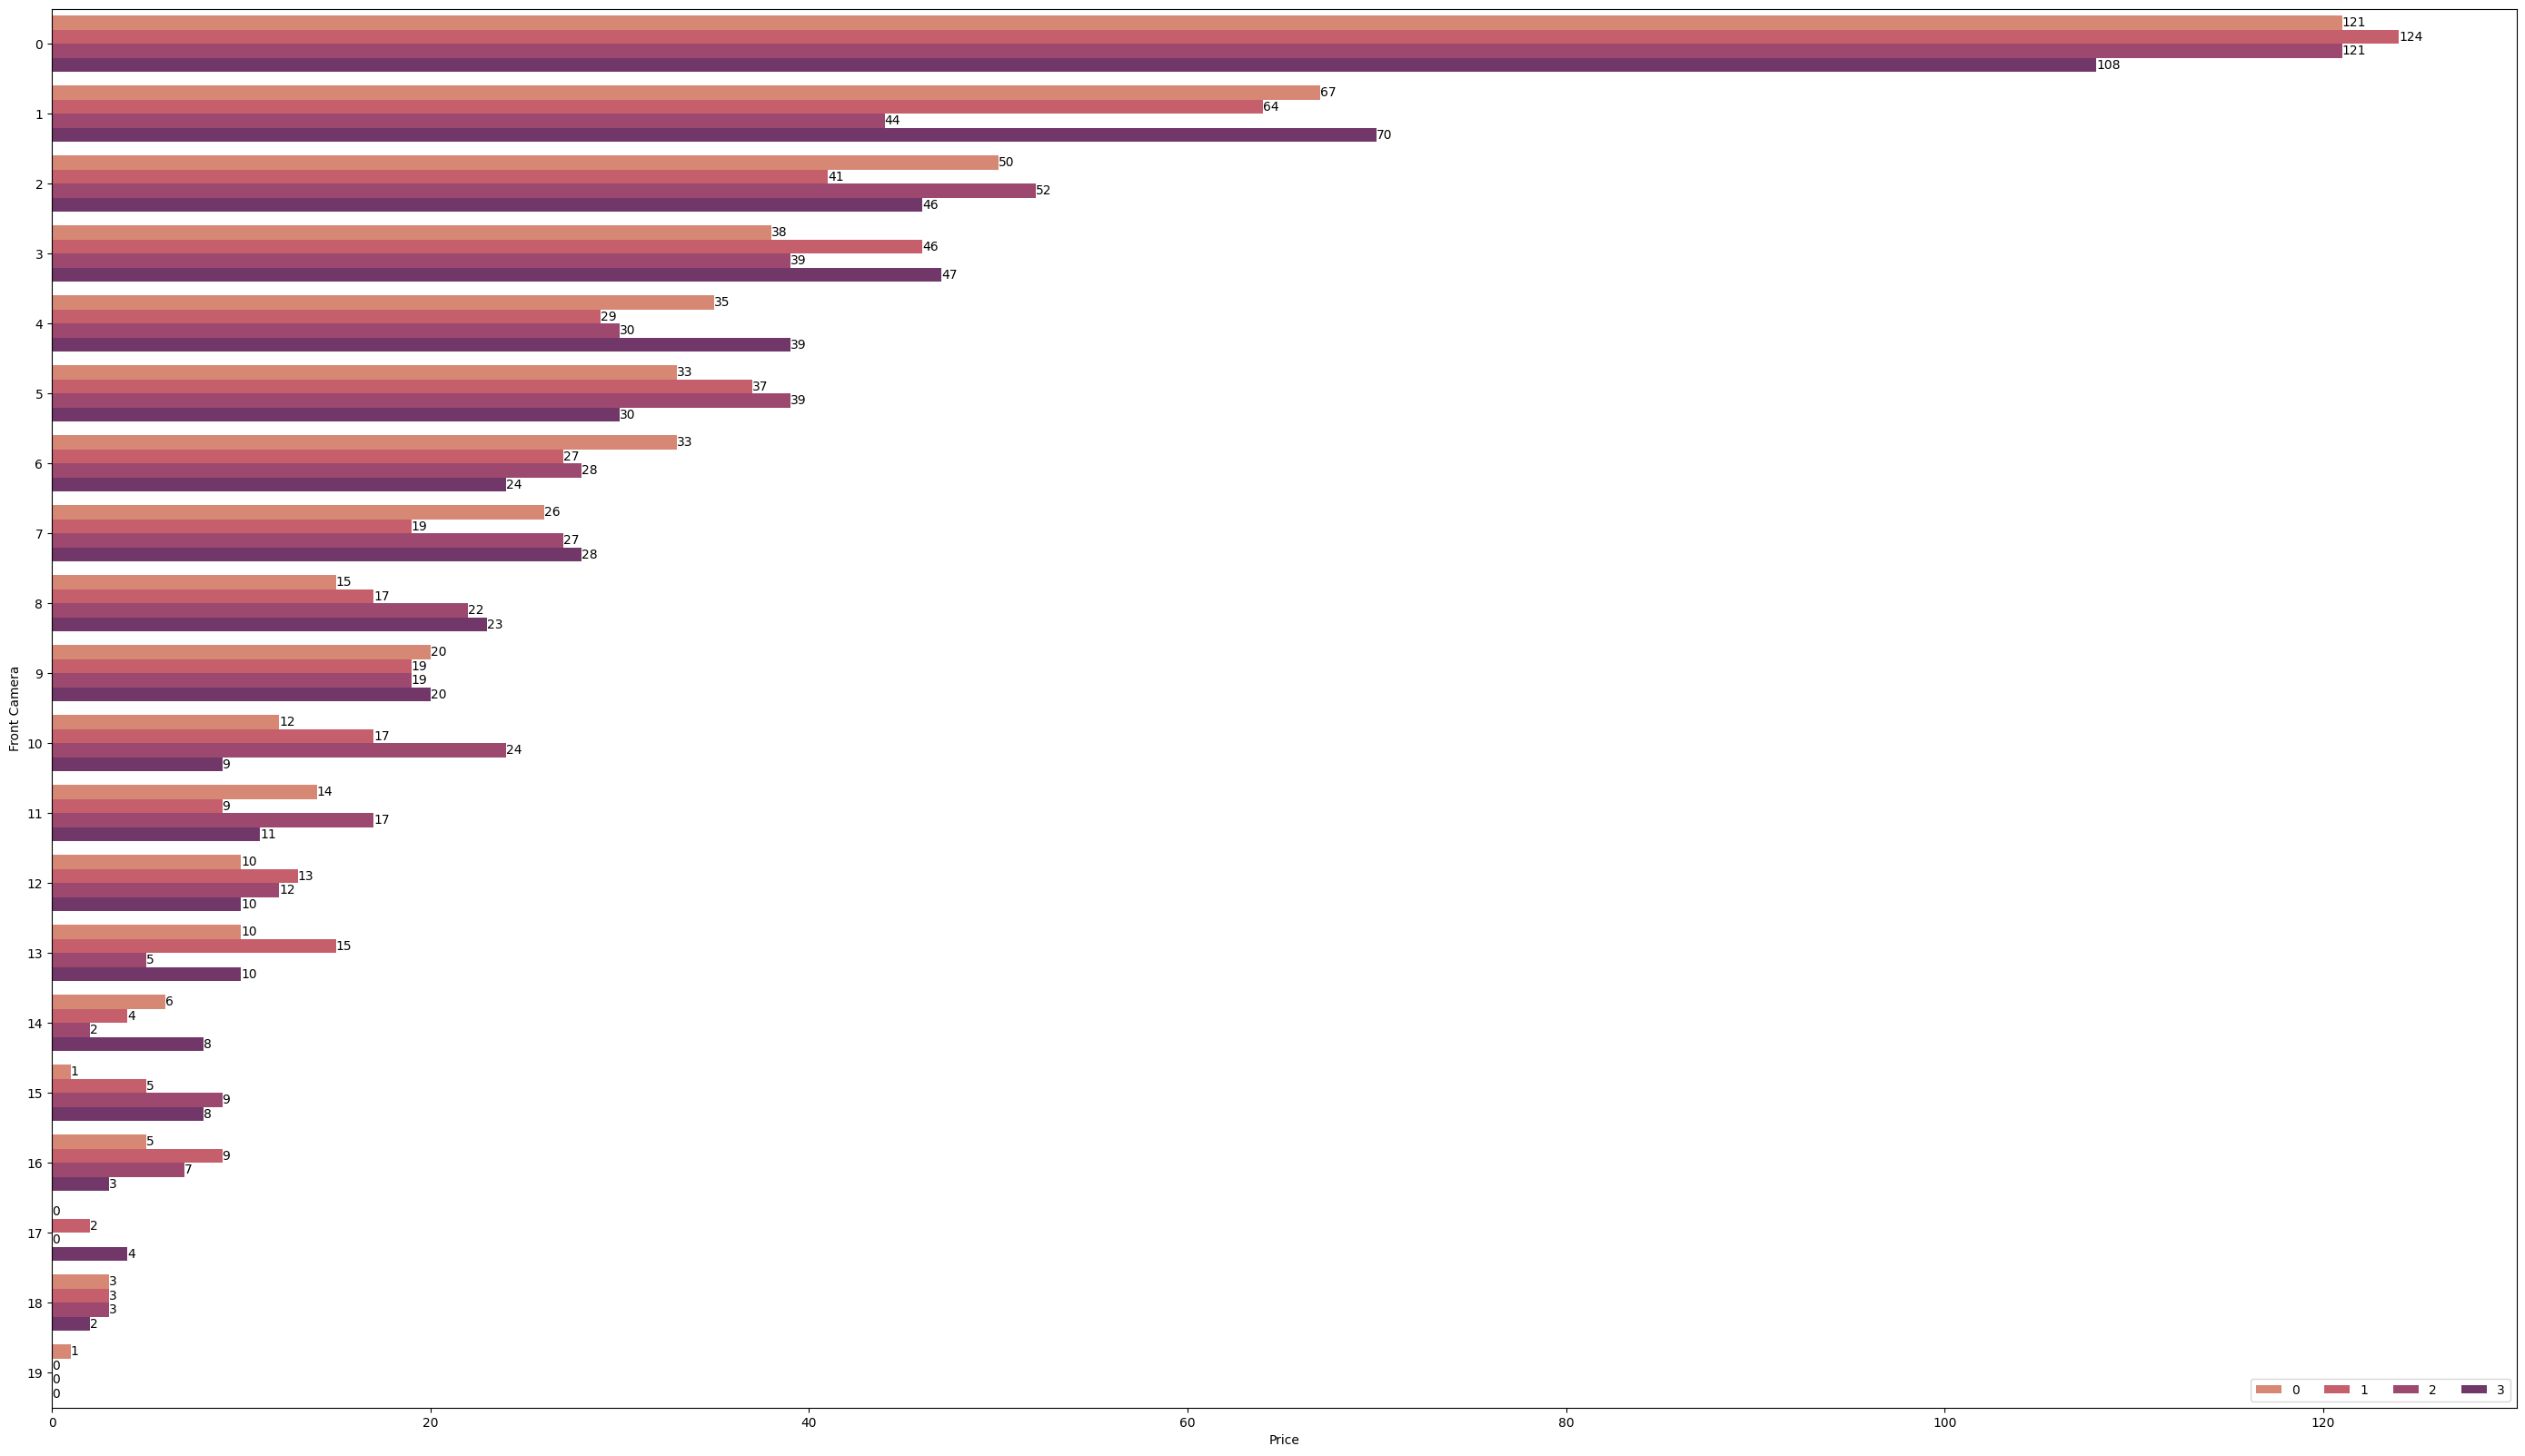

In [ ]:
plt.figure(figsize=(35,20))
ax=sns.countplot(data=dataset,y="Front Camera(MP)",orient="h",hue="price_range",palette="flare")
plt.xlabel("Price")
plt.ylabel("Front Camera")
for i in ax.containers:
  ax.bar_label(i,)
ax.legend(ncol=4, loc="lower right", frameon=True)
plt.show()

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Front camera is common in all prie ranges. The number of front cameras won't drive the price.

#### Chart - 4

In [ ]:
# Chart - 4 visualization code

4. Find the influence of RAM on price?

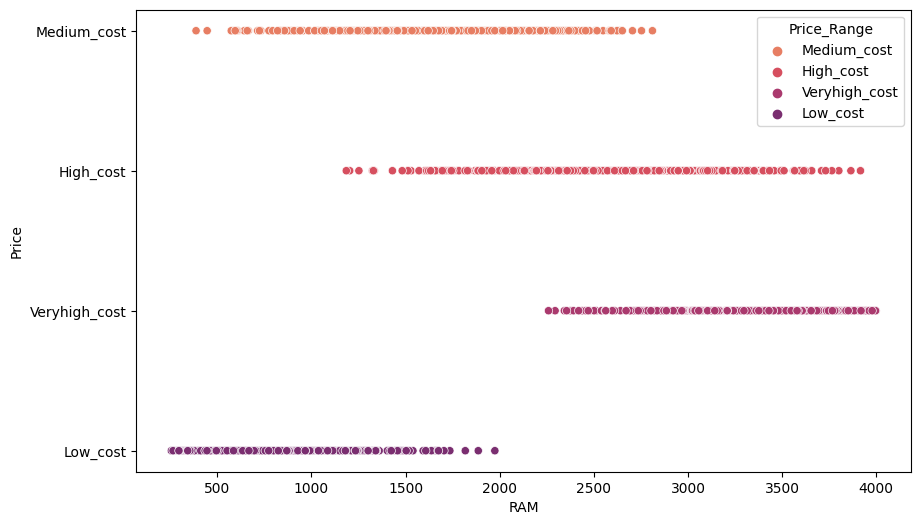

In [ ]:
plt.figure(figsize=(10,6))
ax=sns.scatterplot(data=dataset,x="ram",y="Price_Range",hue="Price_Range",palette="flare")
plt.xlabel("RAM")
plt.ylabel("Price")
plt.show()

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

High price mobiles have more RAM. RAM is above 2000GB for very high cost mobiles. As RAM capacity increases the performance, storage capacity, and battery life of the mobile increases.

#### Chart - 5

In [ ]:
# Chart - 5 visualization code

5. Influence of internal memory and RAM on price?

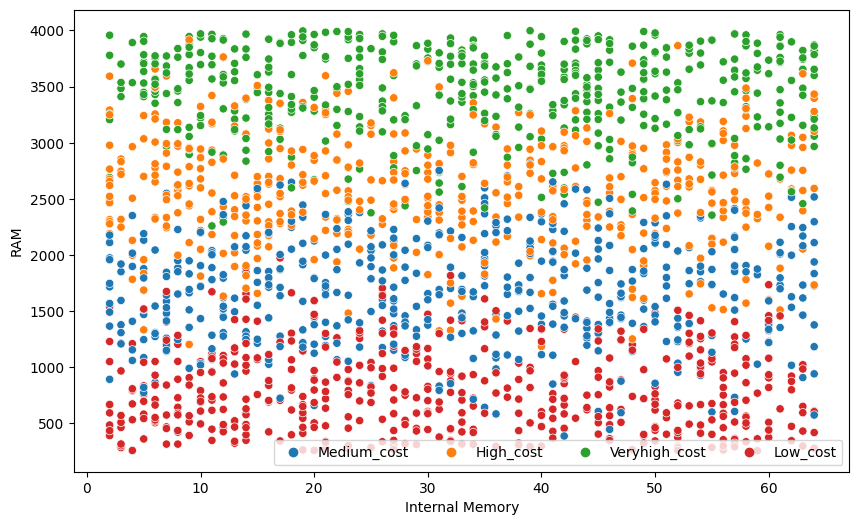

In [ ]:
plt.figure(figsize=(10,6))
ax=sns.scatterplot(data=dataset,x="int_memory",y="ram",hue="Price_Range")
plt.xlabel("Internal Memory")
plt.ylabel("RAM")
ax.legend(ncol=4, loc="lower right", frameon=True)
plt.show()

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Even for low cost mobiles the internal memory can be more but the RAM capacity is less. Veryhigh cost mobiles have more RAM capacity (which influences the performance of the mobile)and more internal memory.

#### Chart - 6

In [ ]:
# Chart - 6 visualization code

Influence of cores and RAM on price:

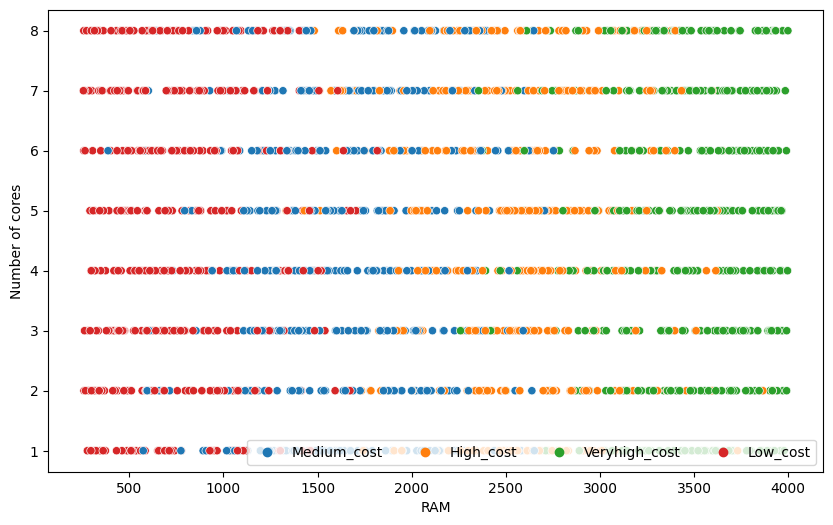

In [ ]:
plt.figure(figsize=(10,6))
ax=sns.scatterplot(data=dataset,y="n_cores",x="ram",hue="Price_Range")
plt.xlabel("RAM")
plt.ylabel("Number of cores")
ax.legend(ncol=4, loc="lower right", frameon=True)
plt.show()

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The number of cores mostly don't effect the price but the RAM does.

#### Chart - 7

In [ ]:
# Chart - 7 visualization code

Find the influence of primary camera on price range?

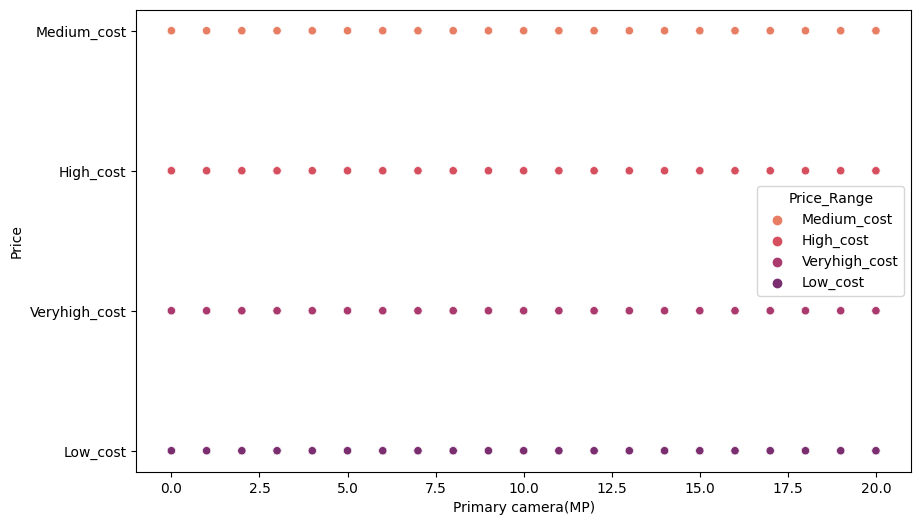

In [ ]:
plt.figure(figsize=(10,6))
ax=sns.scatterplot(data=dataset,x="Primary camera(MP)",y="Price_Range",hue="Price_Range",palette="flare")
plt.xlabel("Primary camera(MP)")
plt.ylabel("Price")
plt.show()

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Primary camera is now common in every mobile phone. So, there is no influence of primary camera on price range.

#### Chart - 8

In [ ]:
# Chart - 8 visualization code

8. Correlation between price and other features of mobile

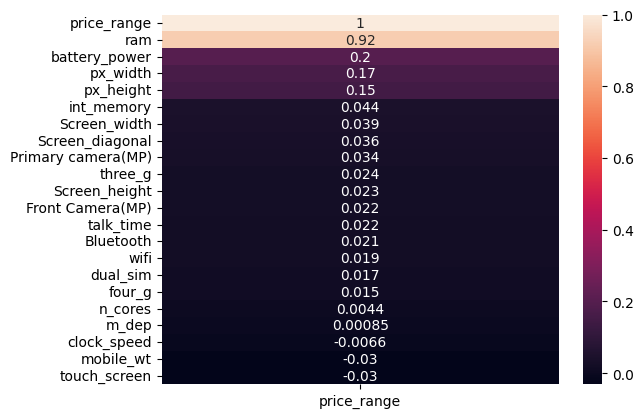

In [ ]:
heatmp=sns.heatmap(dataset.corr()[["price_range"]].sort_values(by="price_range",ascending=False),annot=True)

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

From the correlation graph, it is clear that RAM,battery_power,pixel width and height are 4 main features of mobile which are responsible for 95% of the mobile price.

#### Chart - 9

In [ ]:
# Chart - 9 visualization code

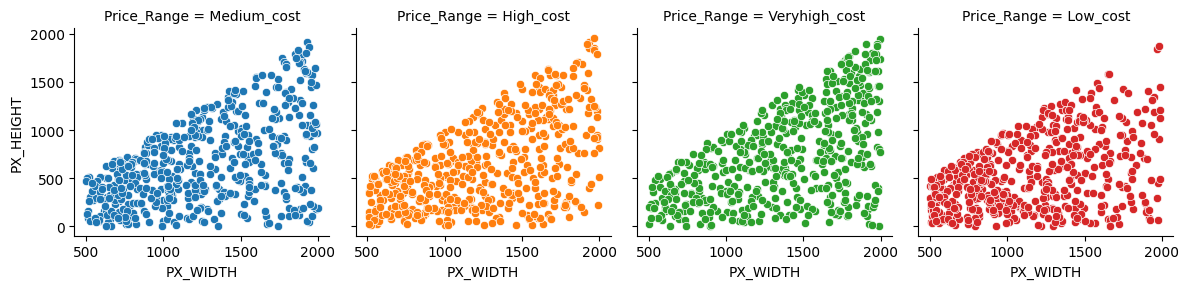

In [ ]:
ax1=sns.FacetGrid(dataset,col="Price_Range",hue="Price_Range")
ax1.map(sns.scatterplot,"px_width","px_height")
ax1.set_axis_labels("PX_WIDTH","PX_HEIGHT")
plt.show()

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The pixel width and height won't have much effect on price range of mobile. It is clear from the graph that, same pixel width and height is avaliable in all price ranges.

#### Chart-10

Find the influence of battery power on price range?

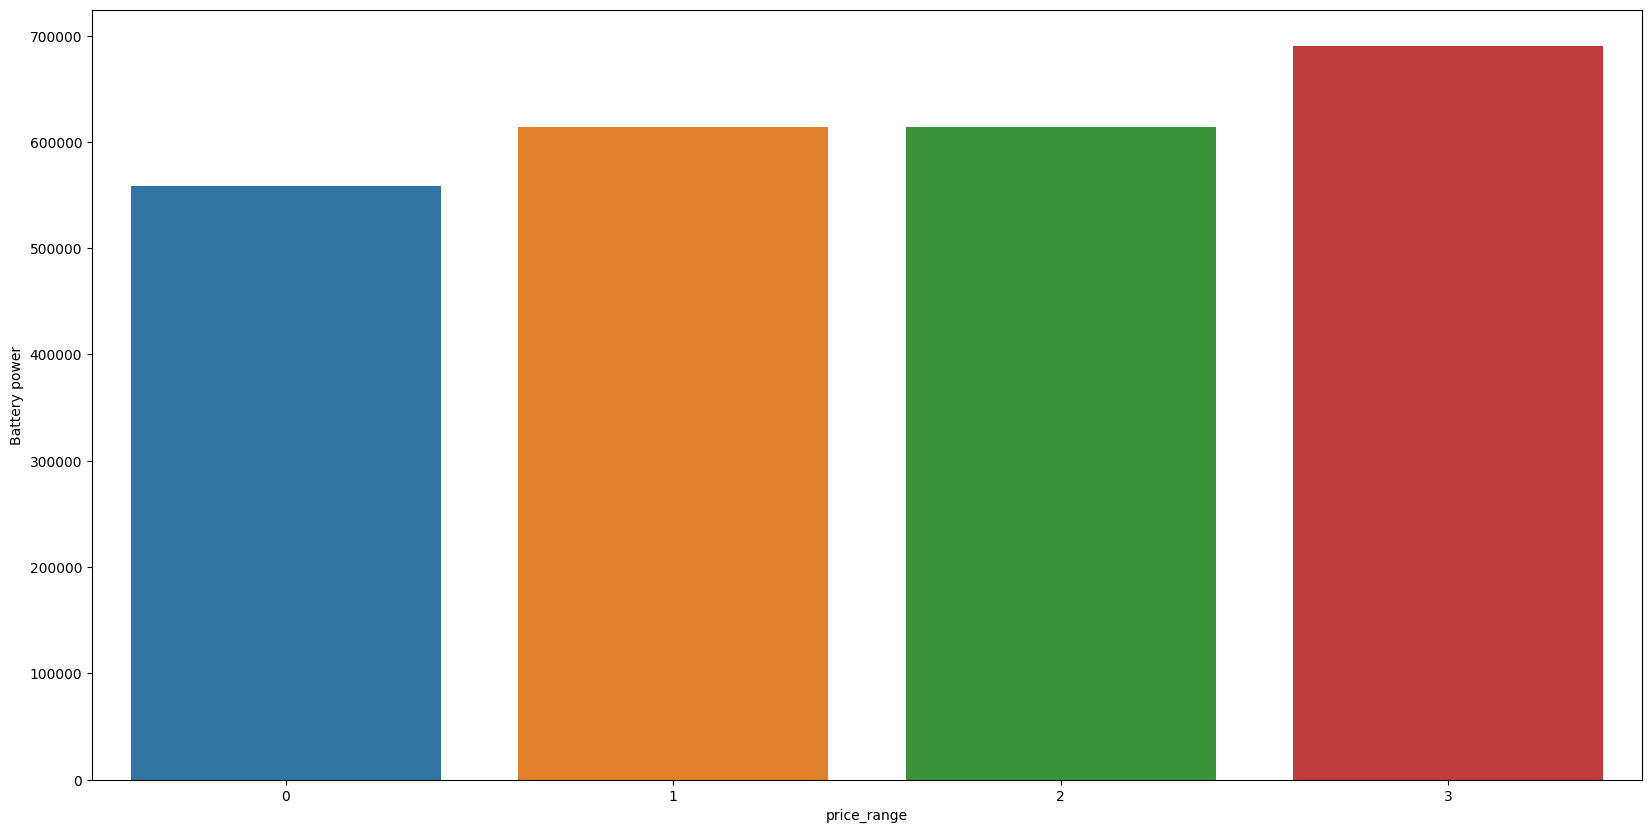

In [ ]:
plt.figure(figsize=(20,10))
a=dataset.groupby(["price_range"])["battery_power"].sum().reset_index()
sns.barplot(data=a,x="price_range",y="battery_power")
plt.xlabel("price_range")
plt.ylabel("Battery power")
plt.show()

For high price mobiles, the battery power is also more. Battery power positively impact the price of the mobile.

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

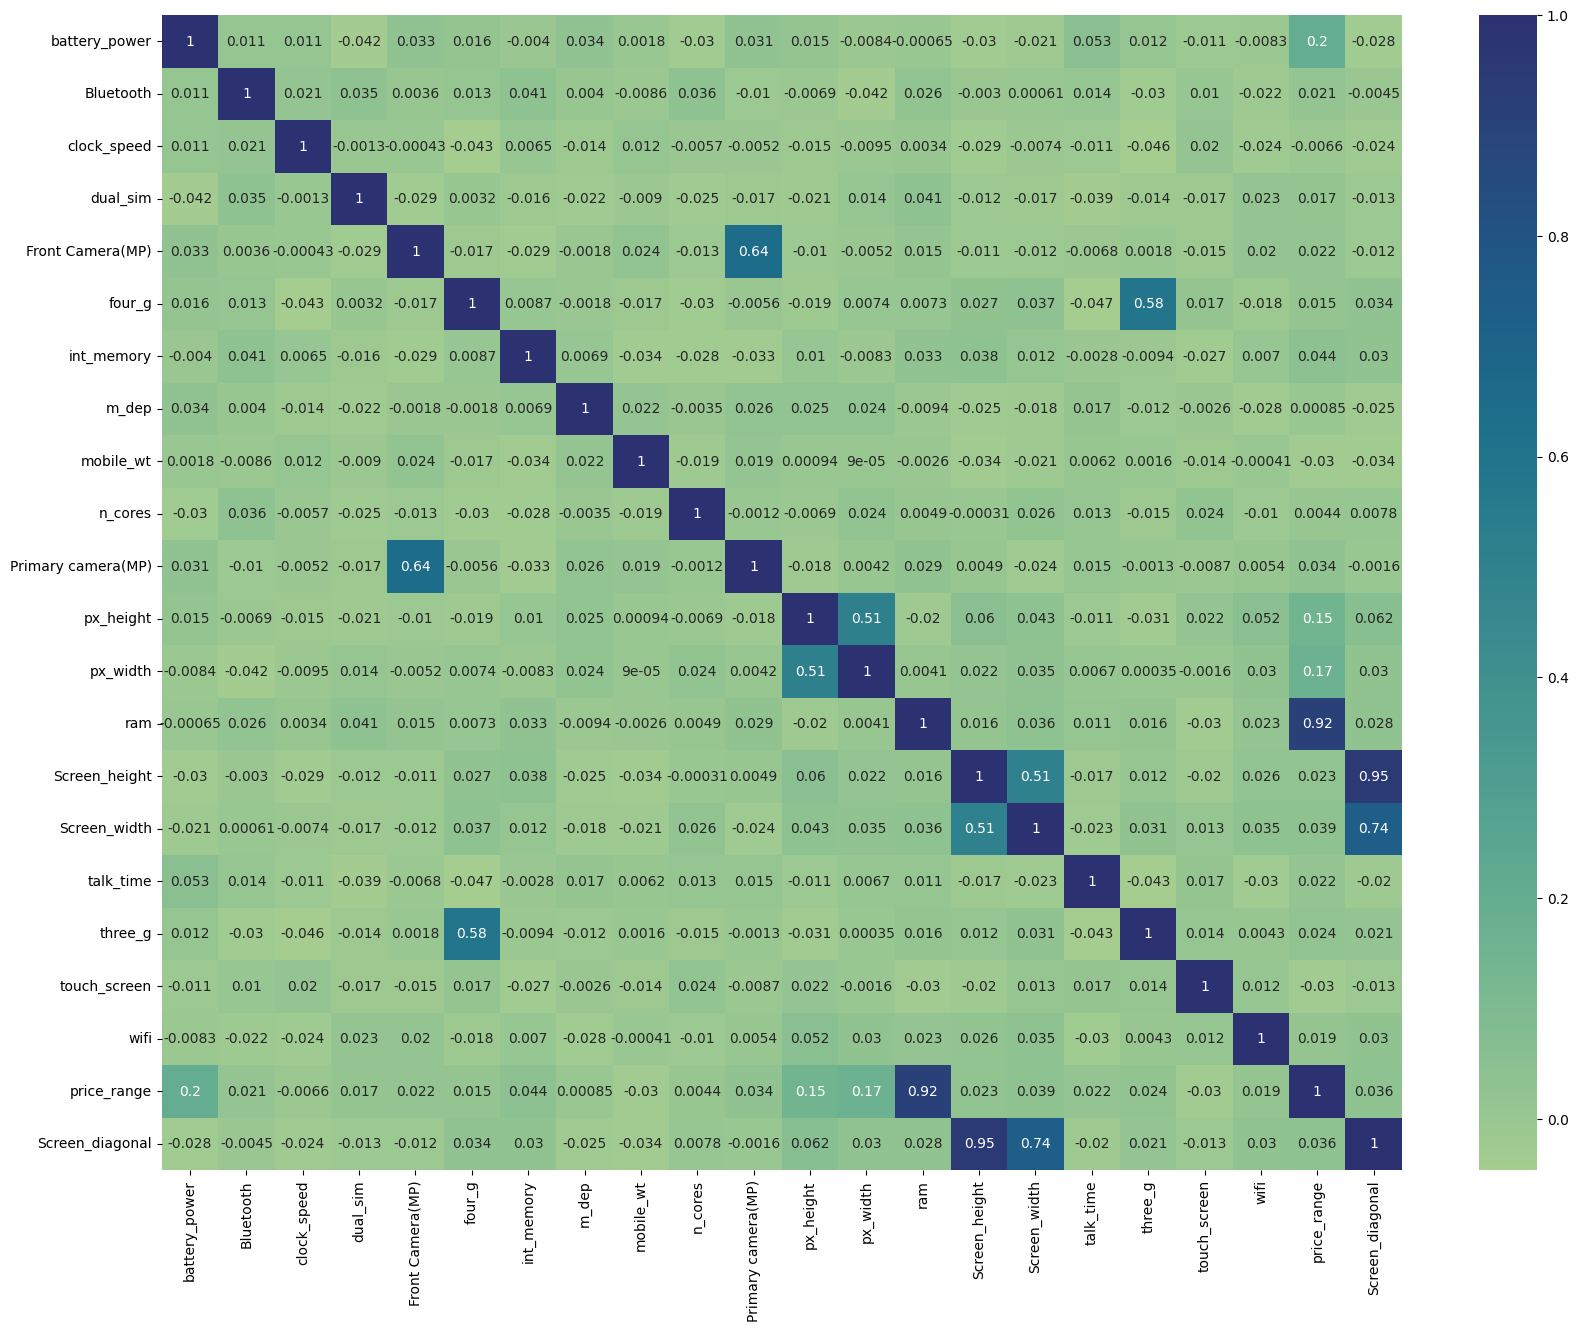

In [ ]:
plt.figure(figsize=(20,15))
heat_map=sns.heatmap(dataset.corr(),annot=True,cmap="crest")
plt.show()

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

From the heat map it is clear that ram, battery power are more correlated to price range. The three_g and four_g, primary camera and front camera are also correlated.

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

Boxplot of all columns in the dataset

<Axes: >

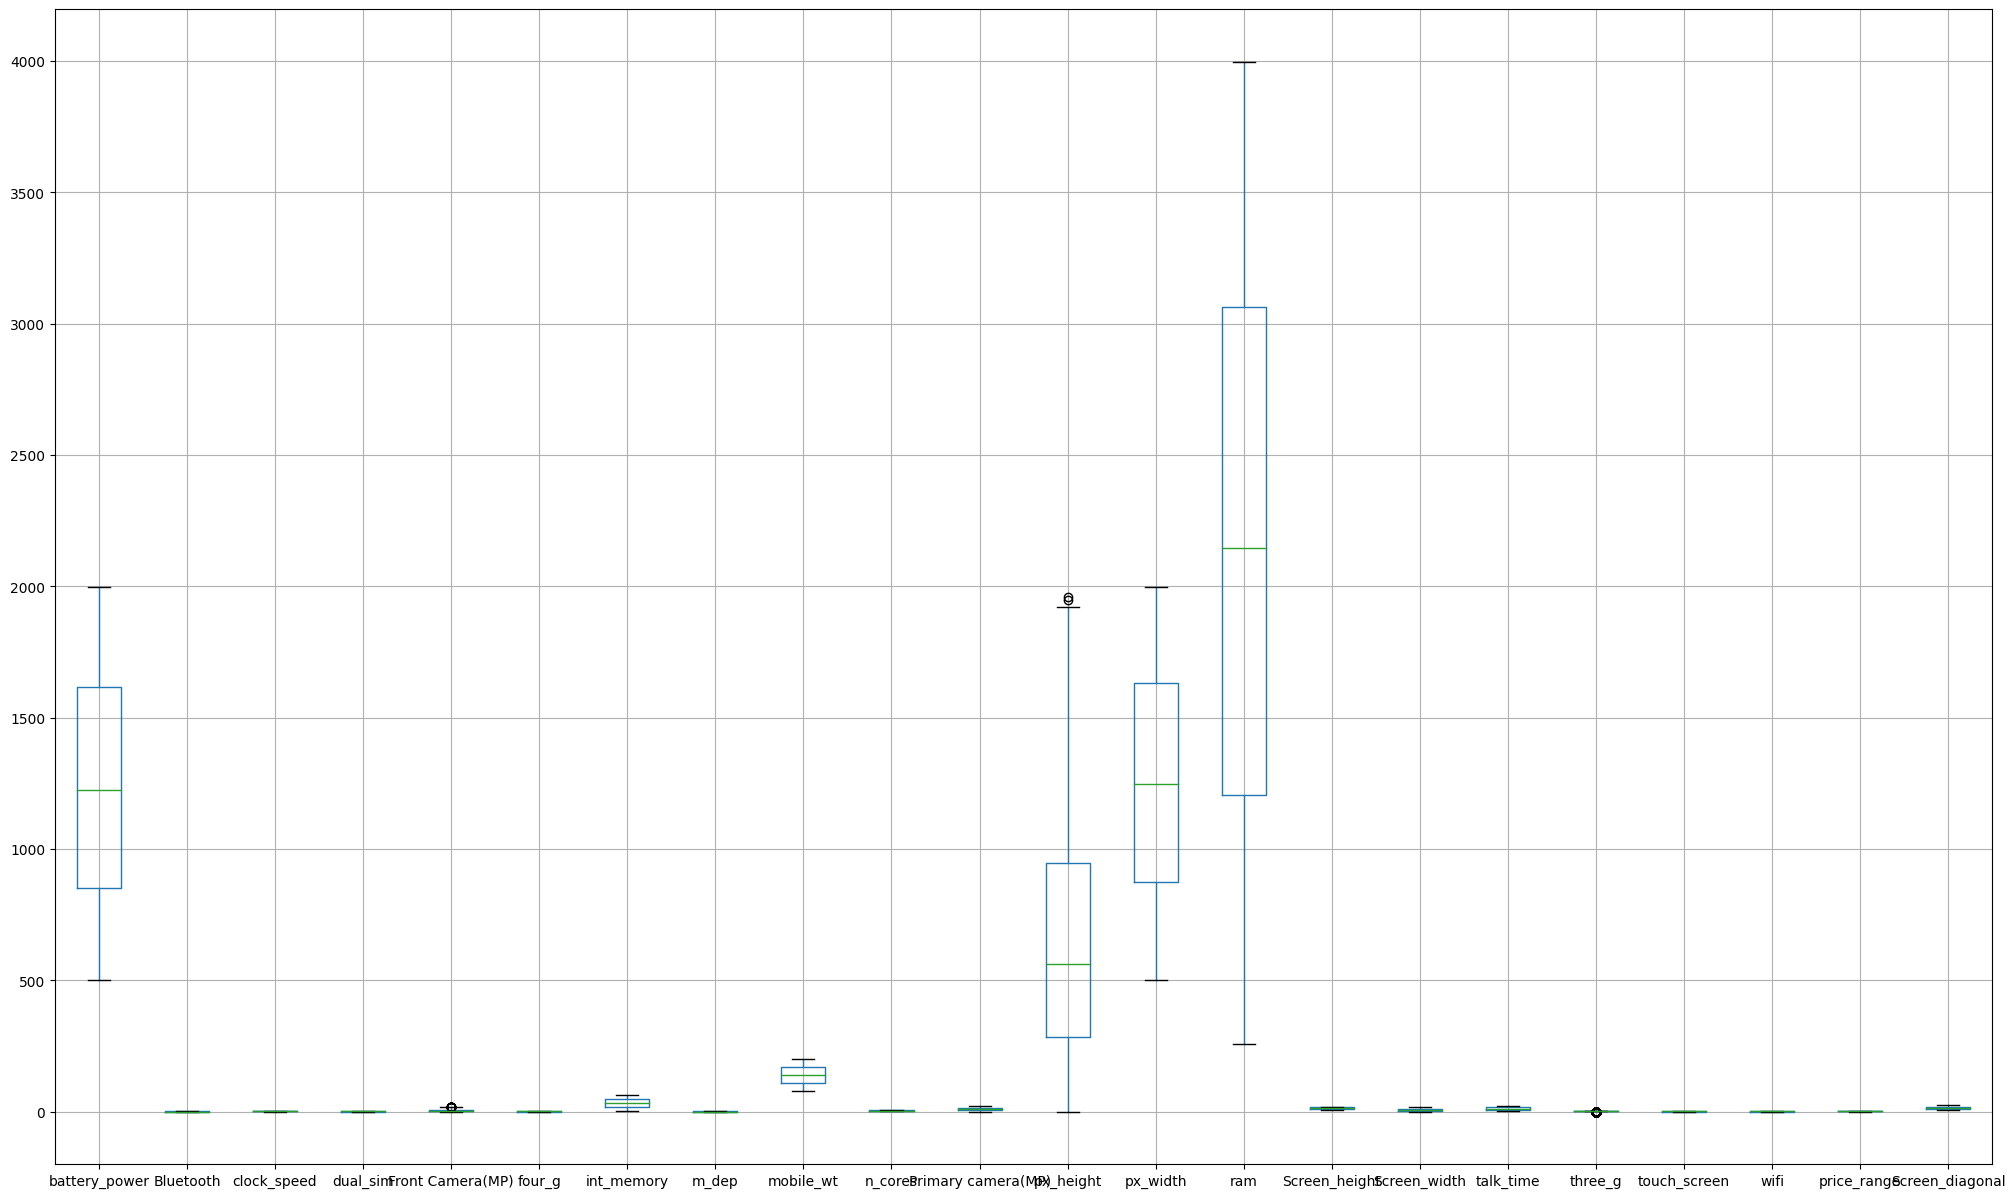

In [ ]:
plt.figure(figsize=(25,15))
dataset.boxplot()

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

There are outliers in front

## ***Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

There are no missing values in the dataset.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

In [ ]:
features=dataset.drop(["Price_Range","Screen_diagonal"],axis=1)

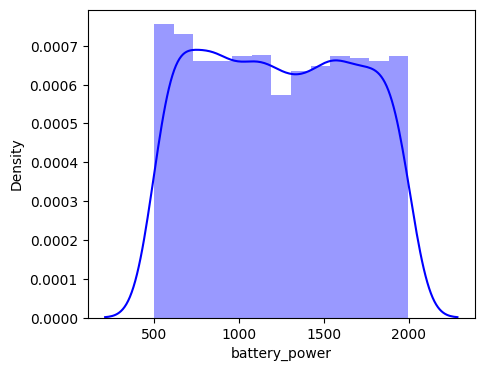

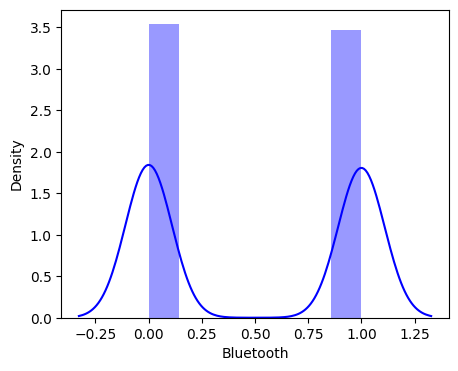

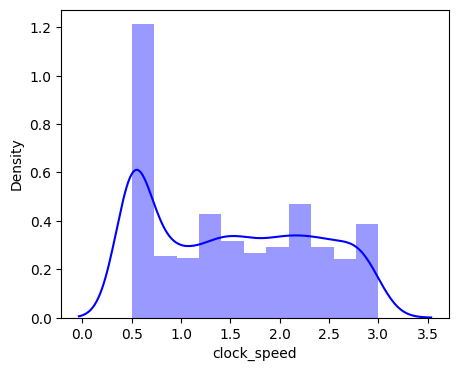

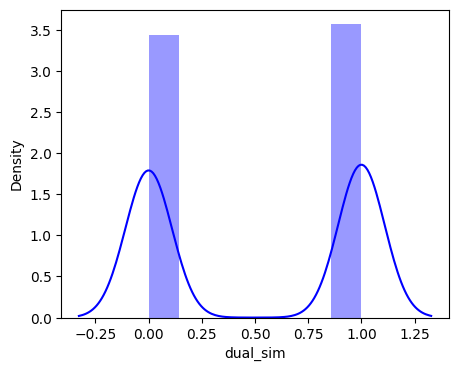

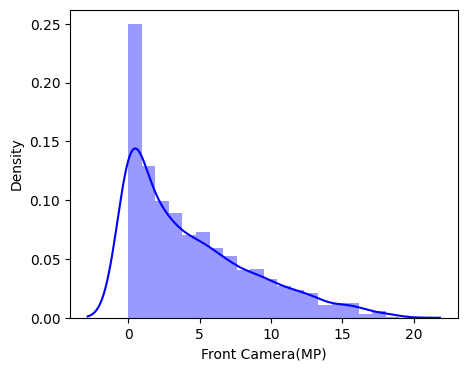

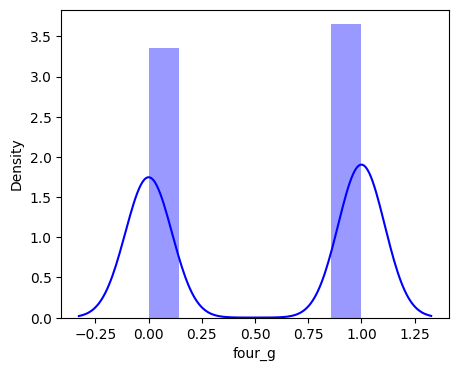

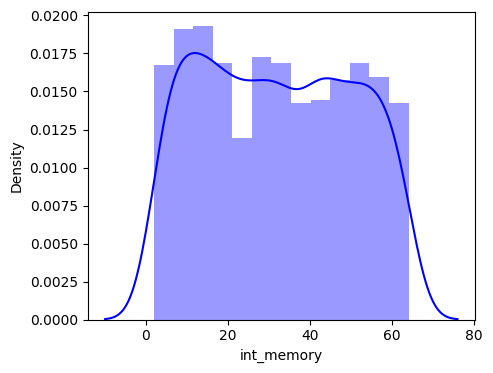

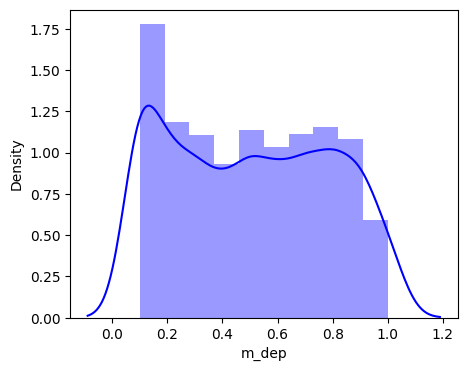

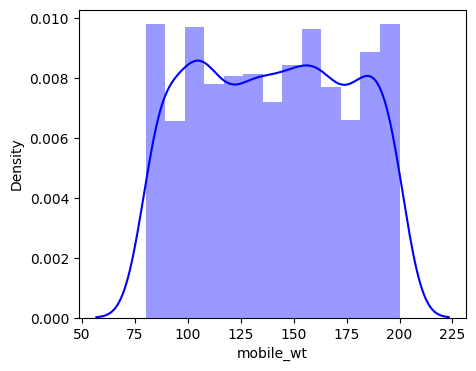

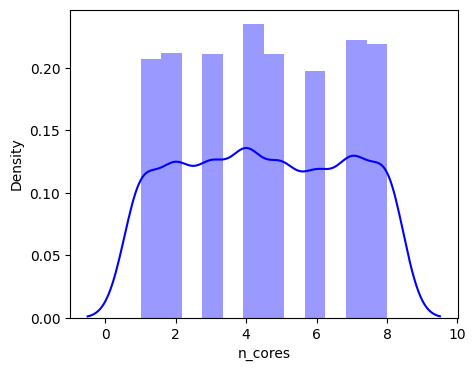

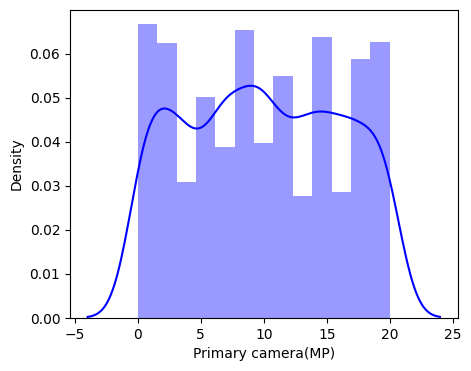

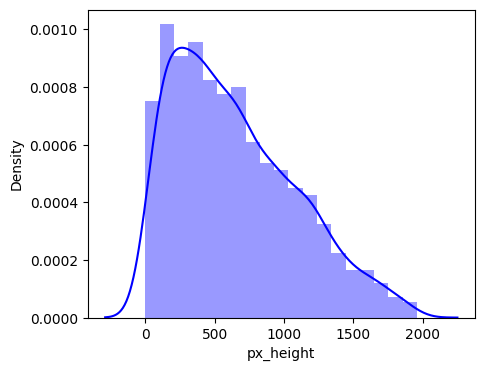

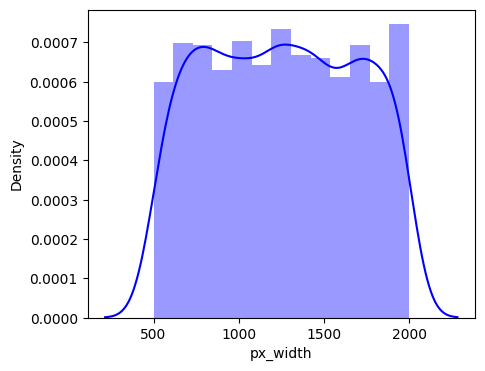

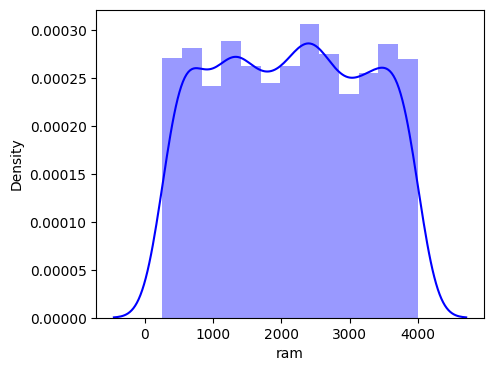

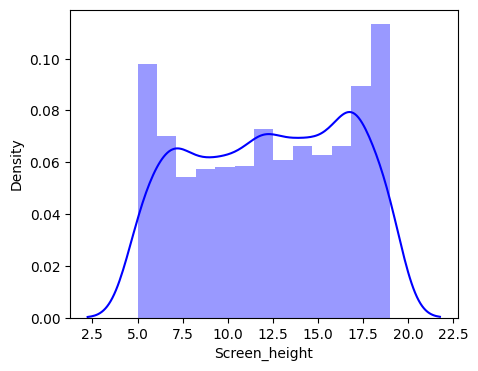

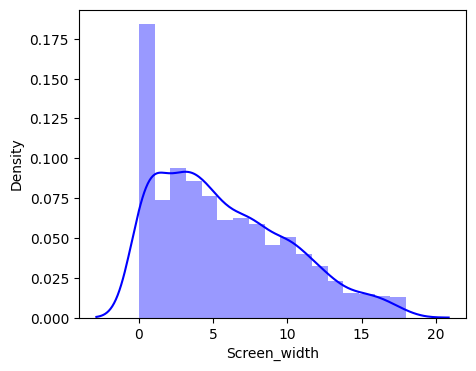

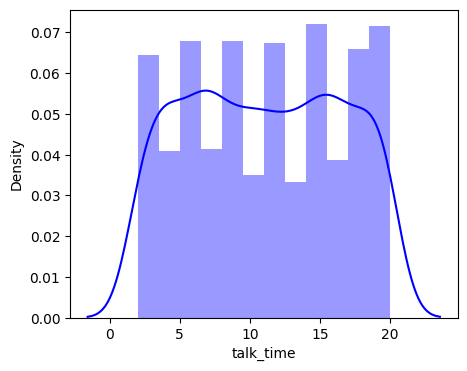

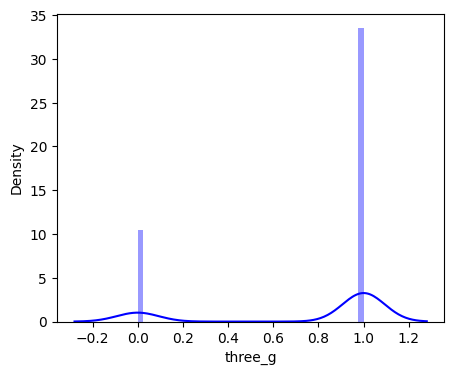

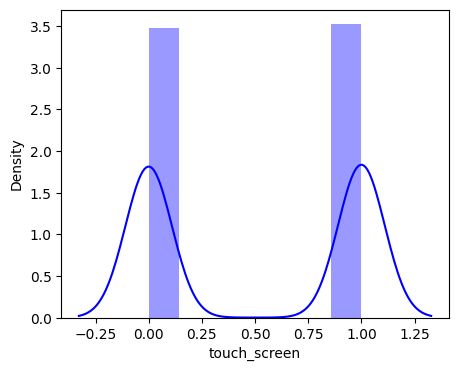

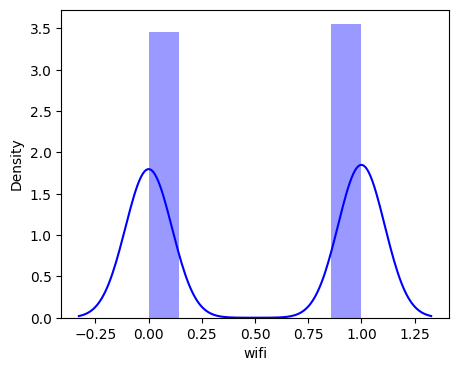

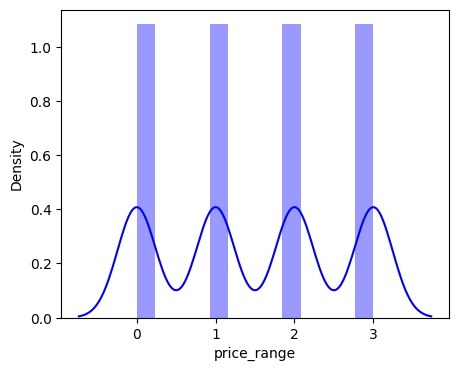

In [ ]:
for col in features.columns:
    plt.figure(figsize=(5,4))
    sns.distplot(dataset[col],color="blue")
plt.show()

### Handling Imbalanced Dataset

The data is fully balanced.

## ***ML Model Implementation***

### ML Model - 1

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
y=dataset["price_range"]
X=dataset.drop(["price_range","Price_Range","Screen_diagonal"],axis=1)

***Function to find classification reports:***

In [ ]:
def evaluation_metrics(model_,X_t, X_test, y_t, y_test):
  model_.fit(X_t,y_t)
  pred=model_.predict(X_test)
  from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report
  result = pd.DataFrame(data=[accuracy_score(y_test,pred),
                                precision_score(y_test,pred, average='macro'),
                                recall_score(y_test,pred, average='macro'),
                                f1_score(y_test,pred, average='macro')],
                          index=['Accuracy','Precision','Recall','F1-score'],columns=["Results"])
  print(classification_report(y_test,pred))
  print(confusion_matrix(y_test,pred))


  print("\n------------------AUC ROC Curve------------------\n")
  from sklearn.metrics import roc_curve
  from sklearn.metrics import roc_auc_score,auc
  pred_proba=model_.predict_proba(X_test)
  fpr={}
  tpr={}
  thresh={}
  roc_auc={}
  n_class=4

  for i in range(n_class):
    fpr[i],tpr[i],thresh[i]=roc_curve(y_test,pred_proba[:,i],pos_label=i)
    roc_auc[i]=auc(fpr[i],tpr[i])

  plt.plot(fpr[0],tpr[0],linestyle='--',color="orange",label='{}: AUC={:.2f}'.format("Class 0",roc_auc[0]))
  plt.plot(fpr[1],tpr[1],linestyle='--',color="blue",label='{}: AUC={:.2f}'.format("Class 1",roc_auc[1]))
  plt.plot(fpr[2],tpr[2],linestyle='--',color="green",label='{}: AUC={:.2f}'.format("Class 2",roc_auc[2]))
  plt.plot(fpr[3],tpr[3],linestyle='--',color="cyan",label='{}: AUC={:.2f}'.format("Class 3",roc_auc[3]))
  #add diagonal line to graph
  plt.plot([0, 1], [0, 1], '--', linewidth=0.5)
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.legend(loc="best")
  plt.savefig('Multiclass ROC',dpi=300);
  return result


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y, test_size = 0.25, random_state = 42)

In [ ]:
X_train_shap=X_train
X_test_shap=X_test

In [ ]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

# **DECISION TREE**

              precision    recall  f1-score   support

           0       0.89      0.94      0.91       125
           1       0.86      0.74      0.80       125
           2       0.74      0.80      0.77       125
           3       0.86      0.86      0.86       125

    accuracy                           0.84       500
   macro avg       0.84      0.84      0.84       500
weighted avg       0.84      0.84      0.84       500

[[118   7   0   0]
 [ 15  93  17   0]
 [  0   8 100  17]
 [  0   0  18 107]]

------------------AUC ROC Curve------------------

            Results
Accuracy   0.836000
Precision  0.837993
Recall     0.836000
F1-score   0.835420


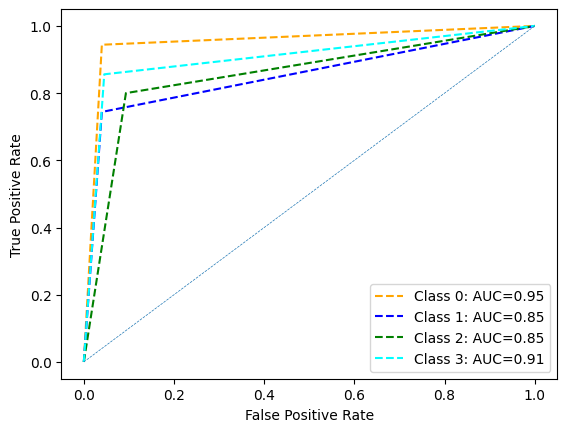

In [ ]:
from sklearn.tree import DecisionTreeClassifier as dtc
DC=dtc()
DC_result=evaluation_metrics(DC,X_train, X_test, y_train, y_test)
print(DC_result)

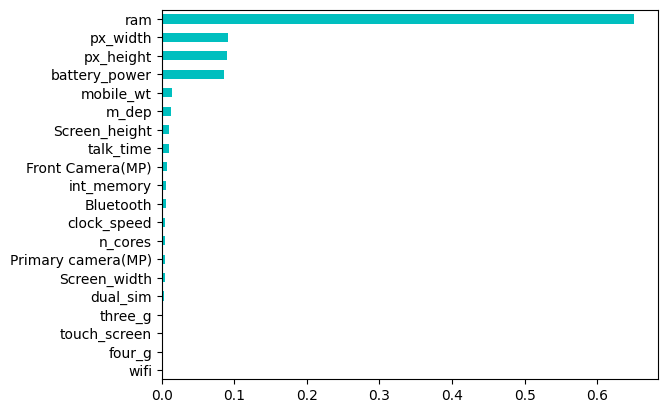

In [ ]:
features=pd.Series(DC.feature_importances_,index= X.columns)
features.sort_values(inplace=True)
features.plot(kind="barh",color='c')
plt.show()

# **TUNED DECISION TREE**

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       125
           1       0.89      0.78      0.83       125
           2       0.77      0.82      0.79       125
           3       0.87      0.86      0.87       125

    accuracy                           0.85       500
   macro avg       0.86      0.85      0.85       500
weighted avg       0.86      0.85      0.85       500

[[120   5   0   0]
 [ 14  97  14   0]
 [  0   7 102  16]
 [  0   0  17 108]]

------------------AUC ROC Curve------------------

            Results
Accuracy   0.854000
Precision  0.855829
Recall     0.854000
F1-score   0.853467


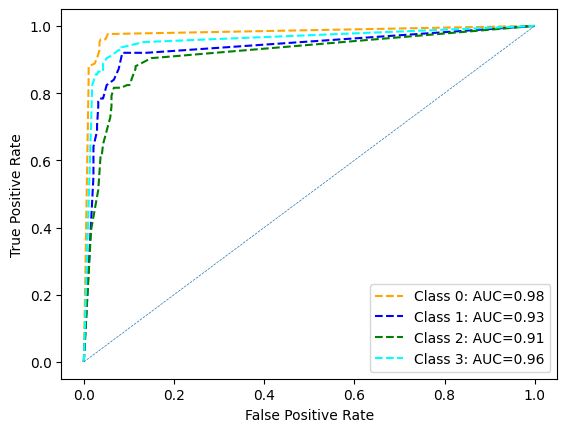

In [ ]:
param_grid={"max_depth":[5,10,15,20,30],
            "criterion":["gini","entropy"],
            'min_samples_split': [5, 13, 21, 34],
            'min_samples_leaf': [5, 13, 21, 34],
            'max_leaf_nodes': [5, 13, 21, 34, 377, None]
}
DC_final = GridSearchCV(estimator=DC,param_grid=param_grid,cv=3)
DC_final_result=evaluation_metrics(DC_final,X_train, X_test, y_train, y_test)
print(DC_final_result)

In [ ]:
DC_final.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'max_leaf_nodes': None,
 'min_samples_leaf': 5,
 'min_samples_split': 5}

# **RANDOM FOREST**

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       125
           1       0.82      0.84      0.83       125
           2       0.81      0.76      0.78       125
           3       0.91      0.94      0.92       125

    accuracy                           0.88       500
   macro avg       0.87      0.88      0.88       500
weighted avg       0.87      0.88      0.88       500

[[121   4   0   0]
 [  5 105  15   0]
 [  0  19  95  11]
 [  0   0   8 117]]

------------------AUC ROC Curve------------------

            Results
Accuracy   0.876000
Precision  0.874944
Recall     0.876000
F1-score   0.875244


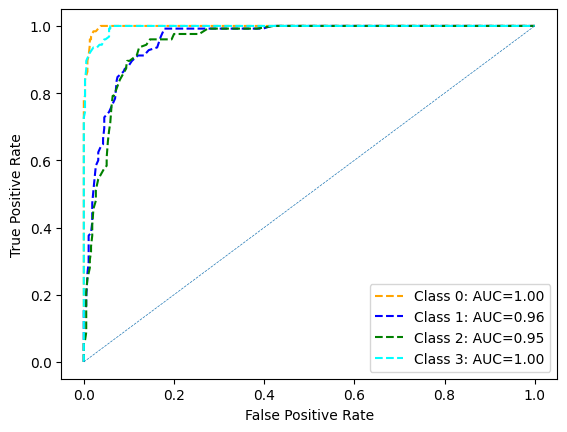

In [ ]:
from sklearn.ensemble import RandomForestClassifier as rfc
RF=rfc()
RF_result=evaluation_metrics(RF,X_train, X_test, y_train, y_test)
print(RF_result)

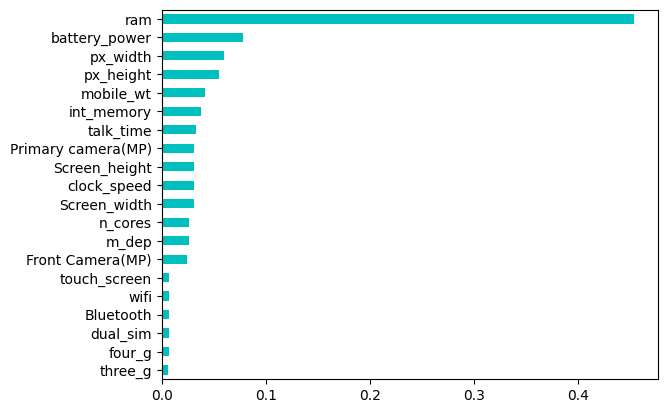

In [ ]:
features=pd.Series(RF.feature_importances_,index= X.columns)
features.sort_values(inplace=True)
features.plot(kind="barh",color='c')
plt.show()

# **TUNED RANDOM FOREST**

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV] END max_depth=10, max_samples=0.5, n_estimators=100, random_state=42; total time=   0.5s
[CV] END max_depth=10, max_samples=0.5, n_estimators=100, random_state=42; total time=   0.5s
[CV] END max_depth=10, max_samples=0.5, n_estimators=100, random_state=42; total time=   0.5s
[CV] END max_depth=10, max_samples=0.5, n_estimators=150, random_state=42; total time=   0.7s
[CV] END max_depth=10, max_samples=0.5, n_estimators=150, random_state=42; total time=   0.6s
[CV] END max_depth=10, max_samples=0.5, n_estimators=150, random_state=42; total time=   0.5s
[CV] END max_depth=10, max_samples=0.5, n_estimators=200, random_state=42; total time=   1.4s
[CV] END max_depth=10, max_samples=0.5, n_estimators=200, random_state=42; total time=   1.4s
[CV] END max_depth=10, max_samples=0.5, n_estimators=200, random_state=42; total time=   1.2s
[CV] END max_depth=10, max_samples=0.75, n_estimators=100, random_state=42; total time=   0.5

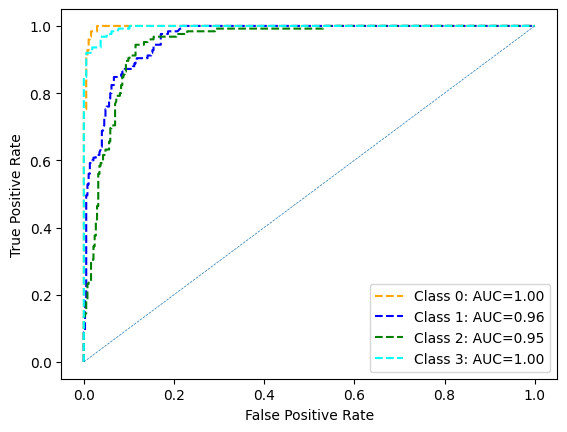

In [ ]:
param_grid={"n_estimators":[100,150,200],
            "max_depth":[10,15,20,30],
            "random_state":[42],
            "max_samples":[0.5,0.75],
}
RF_tuned = GridSearchCV(estimator=RF,param_grid=param_grid,cv=3,n_jobs=1,verbose=2)
RF_tuned_result=evaluation_metrics(RF_tuned,X_train, X_test, y_train, y_test)
print(RF_tuned_result)

In [ ]:
RF_tuned.best_params_

{'max_depth': 15, 'max_samples': 0.75, 'n_estimators': 150, 'random_state': 42}

# **SUPPORT VECTOR MACHINE CLASSIFIER**

In [ ]:
from sklearn.svm import SVC

              precision    recall  f1-score   support

           0       0.97      0.94      0.96       125
           1       0.83      0.85      0.84       125
           2       0.77      0.78      0.78       125
           3       0.89      0.90      0.89       125

    accuracy                           0.87       500
   macro avg       0.87      0.87      0.87       500
weighted avg       0.87      0.87      0.87       500

[[117   8   0   0]
 [  3 106  16   0]
 [  0  13  98  14]
 [  0   0  13 112]]

------------------AUC ROC Curve------------------

            Results
Accuracy   0.866000
Precision  0.867547
Recall     0.866000
F1-score   0.866645


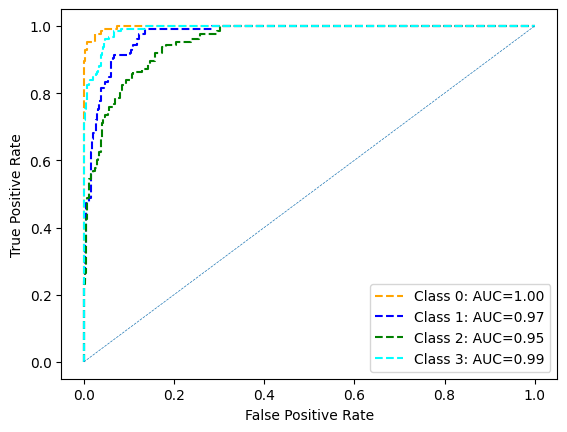

In [ ]:
svm_=SVC(probability=True)
svm_result=evaluation_metrics(svm_,X_train, X_test, y_train, y_test)
print(svm_result)

## **TUNED SVM**

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       125
           1       0.97      0.95      0.96       125
           2       0.95      0.97      0.96       125
           3       0.98      0.98      0.98       125

    accuracy                           0.97       500
   macro avg       0.97      0.97      0.97       500
weighted avg       0.97      0.97      0.97       500

[[123   2   0   0]
 [  1 119   5   0]
 [  0   2 121   2]
 [  0   0   2 123]]

------------------AUC ROC Curve------------------

            Results
Accuracy   0.972000
Precision  0.972182
Recall     0.972000
F1-score   0.972038


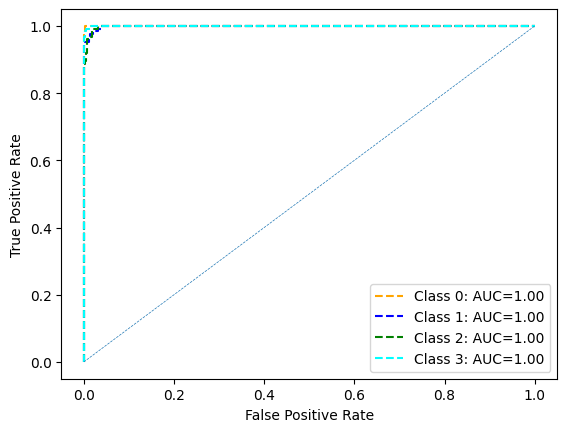

In [ ]:
parameters={'C':[0.1,1,10,100],
            'kernel':['linear','poly','rbf','sigmoid'],
            'gamma':['scale','auto']}
SVM_final = GridSearchCV(svm_, param_grid=parameters, scoring='accuracy', n_jobs=-1, cv=3)
SVM_final_result=evaluation_metrics(SVM_final,X_train, X_test, y_train, y_test)
print(SVM_final_result)

# **LOGISTIC REGRESSION**

              precision    recall  f1-score   support

           0       0.99      0.96      0.98       125
           1       0.94      0.96      0.95       125
           2       0.95      0.95      0.95       125
           3       0.97      0.98      0.98       125

    accuracy                           0.96       500
   macro avg       0.96      0.96      0.96       500
weighted avg       0.96      0.96      0.96       500

[[120   5   0   0]
 [  1 120   4   0]
 [  0   2 119   4]
 [  0   0   2 123]]

------------------AUC ROC Curve------------------

            Results
Accuracy   0.964000
Precision  0.964280
Recall     0.964000
F1-score   0.964045


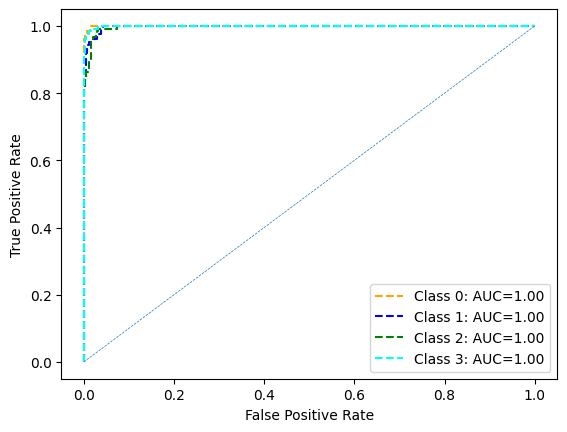

In [ ]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR_result=evaluation_metrics(LR,X_train, X_test, y_train, y_test)
print(LR_result)

# **GRADIENT BOOSTING CLASSIFIER:**

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       125
           1       0.87      0.86      0.87       125
           2       0.86      0.87      0.87       125
           3       0.97      0.94      0.96       125

    accuracy                           0.91       500
   macro avg       0.91      0.91      0.91       500
weighted avg       0.91      0.91      0.91       500

[[122   3   0   0]
 [  7 108  10   0]
 [  0  13 109   3]
 [  0   0   8 117]]

------------------AUC ROC Curve------------------

            Results
Accuracy   0.912000
Precision  0.912493
Recall     0.912000
F1-score   0.912070


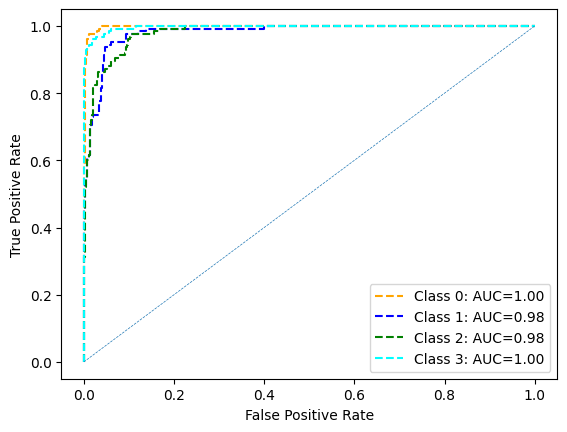

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
GBC=GradientBoostingClassifier()
GBC_result=evaluation_metrics(GBC,X_train, X_test, y_train, y_test)
print(GBC_result)

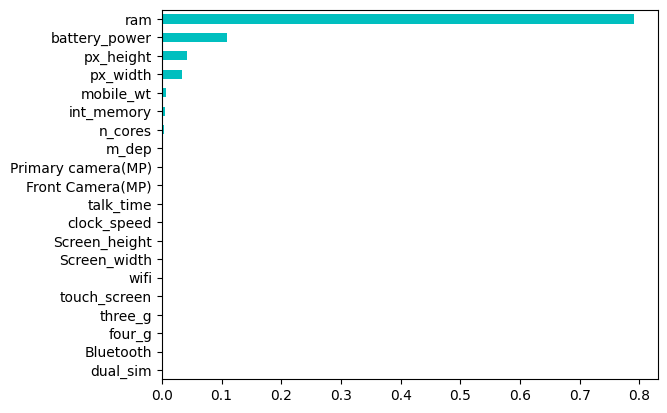

In [ ]:
features=pd.Series(GBC.feature_importances_,index= X.columns)
features.sort_values(inplace=True)
features.plot(kind="barh",color='c')
plt.show()

# **TUNED GRADIENT BOOSTING CLASSIFIER**

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       125
           1       0.89      0.86      0.87       125
           2       0.83      0.90      0.87       125
           3       0.97      0.91      0.94       125

    accuracy                           0.91       500
   macro avg       0.91      0.91      0.91       500
weighted avg       0.91      0.91      0.91       500

[[120   5   0   0]
 [  5 108  12   0]
 [  0   9 113   3]
 [  0   0  11 114]]

------------------AUC ROC Curve------------------

            Results
Accuracy   0.910000
Precision  0.912622
Recall     0.910000
F1-score   0.910636


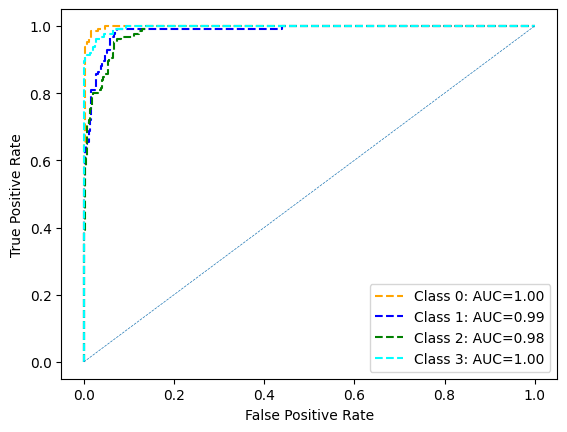

In [ ]:
parameters={"learning_rate": [0.1,0.001],
 "max_depth": [10,15,20],
 "n_estimators":[100,150,200],
 "random_state":[42],
 "subsample":[0.5,0.75],
            }
GBC_final=GridSearchCV(estimator=GBC, param_grid = parameters,cv = 3, n_jobs=-1)
GBC_final_result=evaluation_metrics(GBC_final,X_train, X_test, y_train, y_test)
print(GBC_final_result)

In [ ]:
GBC_final.best_params_

{'learning_rate': 0.1,
 'max_depth': 10,
 'n_estimators': 150,
 'random_state': 42,
 'subsample': 0.75}

# **EXTREME GRADIENT BOOSTING CLASSIFIER:**

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       125
           1       0.90      0.91      0.91       125
           2       0.87      0.90      0.88       125
           3       0.96      0.92      0.94       125

    accuracy                           0.92       500
   macro avg       0.92      0.92      0.92       500
weighted avg       0.92      0.92      0.92       500

[[121   4   0   0]
 [  4 114   7   0]
 [  0   8 112   5]
 [  0   0  10 115]]

------------------AUC ROC Curve------------------

            Results
Accuracy   0.924000
Precision  0.924828
Recall     0.924000
F1-score   0.924258


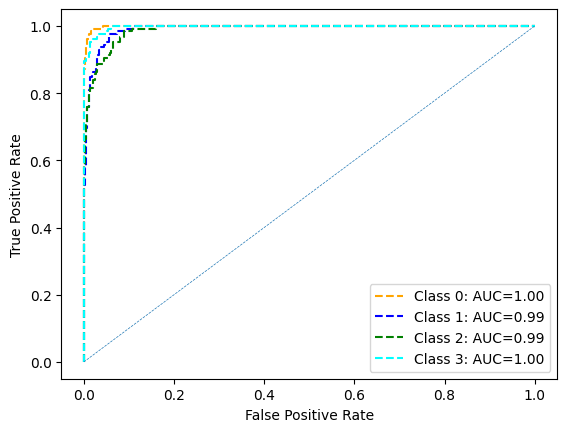

In [ ]:
from xgboost import XGBClassifier
XGB=XGBClassifier()
XGB_result=evaluation_metrics(XGB,X_train, X_test, y_train, y_test)
print(XGB_result)

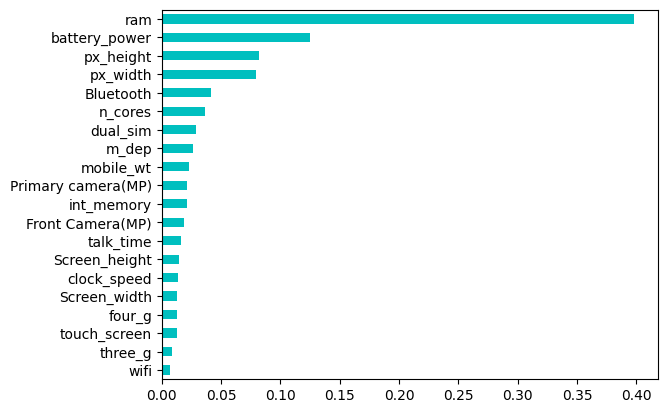

In [ ]:
features=pd.Series(XGB.feature_importances_,index= X.columns)
features.sort_values(inplace=True)
features.plot(kind="barh",color='c')
plt.show()

# **TUNED XGB**

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       125
           1       0.89      0.95      0.92       125
           2       0.91      0.86      0.89       125
           3       0.95      0.94      0.95       125

    accuracy                           0.93       500
   macro avg       0.93      0.93      0.93       500
weighted avg       0.93      0.93      0.93       500

[[121   4   0   0]
 [  2 119   4   0]
 [  0  11 108   6]
 [  0   0   7 118]]

------------------AUC ROC Curve------------------

            Results
Accuracy   0.932000
Precision  0.932744
Recall     0.932000
F1-score   0.931941


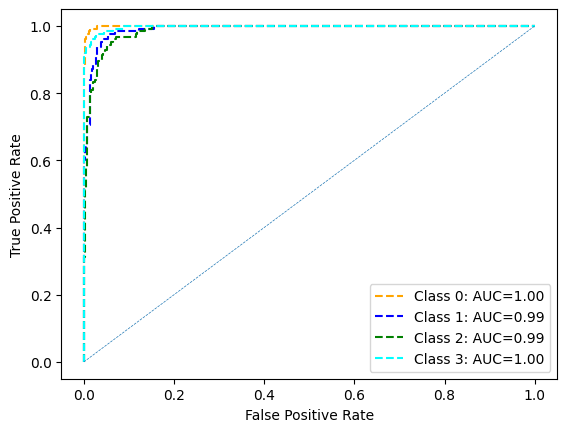

In [ ]:
parameters={"learning_rate": [0.1,0.001],
 "max_depth": [5,10,15,20],
 "n_estimators":[100,150,500],
 "random_state":[1,42],
 "subsample":[0.5,0.75],
            }
XGB_final=GridSearchCV(estimator=XGB, param_grid = parameters, scoring ='accuracy',cv = 3, n_jobs=-1)
XGB_final_result=evaluation_metrics(XGB_final,X_train, X_test, y_train, y_test)
print(XGB_final_result)

In [ ]:
XGB_final.best_params_

{'learning_rate': 0.1,
 'max_depth': 5,
 'n_estimators': 150,
 'random_state': 1,
 'subsample': 0.5}

# **KNN CLASSIFIER**

              precision    recall  f1-score   support

           0       0.64      0.68      0.66       125
           1       0.32      0.37      0.34       125
           2       0.37      0.39      0.38       125
           3       0.67      0.46      0.55       125

    accuracy                           0.48       500
   macro avg       0.50      0.48      0.48       500
weighted avg       0.50      0.48      0.48       500

[[85 34  6  0]
 [38 46 31 10]
 [10 47 49 19]
 [ 0 19 48 58]]

------------------AUC ROC Curve------------------

            Results
Accuracy   0.476000
Precision  0.496626
Recall     0.476000
F1-score   0.480987


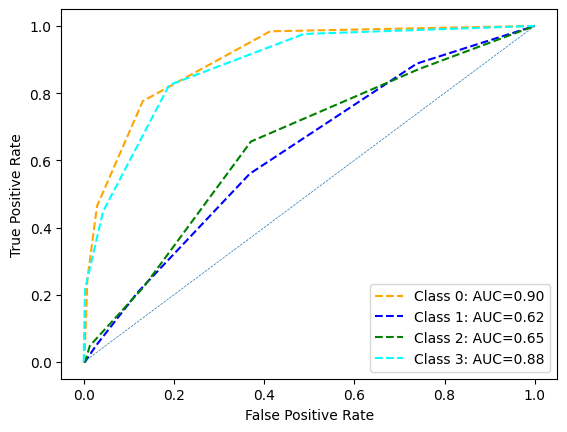

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier()
KNN_result=evaluation_metrics(KNN,X_train, X_test, y_train, y_test)
print(KNN_result)

# **TUNED KNN CLASSIFIER**

              precision    recall  f1-score   support

           0       0.73      0.76      0.74       125
           1       0.51      0.51      0.51       125
           2       0.47      0.50      0.49       125
           3       0.75      0.66      0.70       125

    accuracy                           0.61       500
   macro avg       0.61      0.61      0.61       500
weighted avg       0.61      0.61      0.61       500

[[95 25  5  0]
 [33 64 27  1]
 [ 3 32 63 27]
 [ 0  4 38 83]]

------------------AUC ROC Curve------------------

            Results
Accuracy   0.610000
Precision  0.614656
Recall     0.610000
F1-score   0.611487


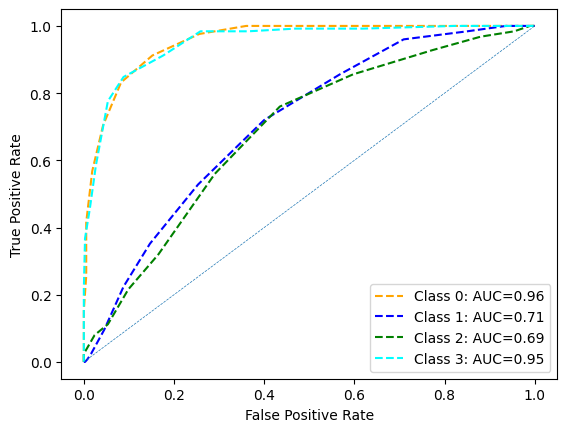

In [ ]:
param_grid={"n_neighbors":[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]}
KNN_final=GridSearchCV(KNN,param_grid,cv=5)
KNN_final_result=evaluation_metrics(KNN_final,X_train, X_test, y_train, y_test)
print(KNN_final_result)

In [ ]:
print("The best fit value is found out to be :" , KNN_final.best_params_)

The best fit value is found out to be : {'n_neighbors': 20}


# **VOTING CLASSIFIER**

In [ ]:
from sklearn.ensemble import StackingClassifier,VotingClassifier

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       125
           1       0.89      0.88      0.88       125
           2       0.84      0.90      0.87       125
           3       0.97      0.91      0.94       125

    accuracy                           0.91       500
   macro avg       0.92      0.91      0.91       500
weighted avg       0.92      0.91      0.91       500

[[120   5   0   0]
 [  5 110  10   0]
 [  0   9 113   3]
 [  0   0  11 114]]

------------------AUC ROC Curve------------------

            Results
Accuracy   0.914000
Precision  0.916185
Recall     0.914000
F1-score   0.914567


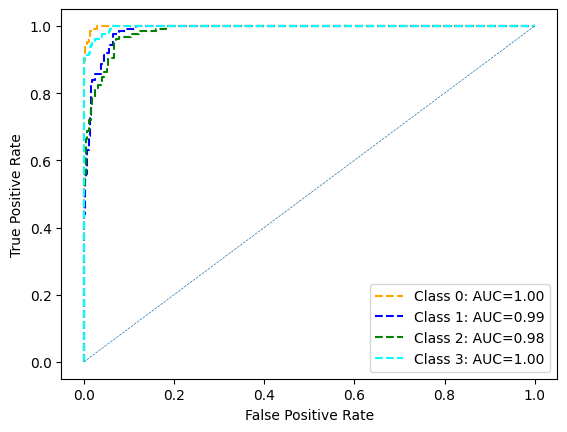

In [ ]:
rf = rfc()
gbdt = GradientBoostingClassifier(learning_rate= 0.1,max_depth=10,n_estimators=150,random_state=42,subsample=0.75)
xgb = XGBClassifier(learning_rate=0.1,max_depth=5,n_estimators=150,random_state=1,subsample=0.5)
VR = VotingClassifier([('rf', rf), ('gbdt', gbdt), ('xgb',xgb)],weights=[1,5,1],voting="soft")
VR_result=evaluation_metrics(VR,X_train, X_test, y_train, y_test)
print(VR_result)

# **STACKING CLASSIFIER**

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       125
           1       0.91      0.94      0.92       125
           2       0.90      0.88      0.89       125
           3       0.95      0.94      0.95       125

    accuracy                           0.93       500
   macro avg       0.93      0.93      0.93       500
weighted avg       0.93      0.93      0.93       500

[[122   3   0   0]
 [  3 117   5   0]
 [  0   9 110   6]
 [  0   0   7 118]]

------------------AUC ROC Curve------------------

            Results
Accuracy   0.934000
Precision  0.934057
Recall     0.934000
F1-score   0.933935


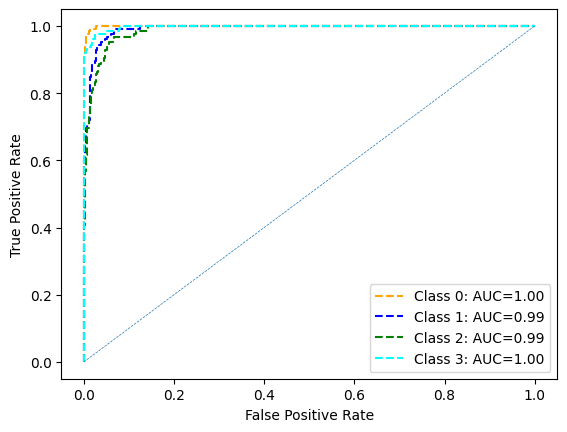

In [ ]:
estimators = [
    ('rf', rfc()),
    ('gbdt',GradientBoostingClassifier(learning_rate= 0.1,max_depth=6,n_estimators=200,random_state=42,subsample=0.75)),
    ('xgb',XGBClassifier(learning_rate=0.1,max_depth=5,n_estimators=150,random_state=1,subsample=0.5))
]

SR = StackingClassifier(estimators=estimators, final_estimator=LR)
SR_result=evaluation_metrics(SR,X_train, X_test, y_train, y_test)
print(SR_result)

# **CATBOOST CLASSIFIER**

In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.3 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier

Learning rate set to 0.08078
0:	learn: 1.2802540	total: 55.3ms	remaining: 55.2s
1:	learn: 1.1855306	total: 63.1ms	remaining: 31.5s
2:	learn: 1.1120568	total: 69.4ms	remaining: 23.1s
3:	learn: 1.0393940	total: 76.8ms	remaining: 19.1s
4:	learn: 0.9808005	total: 83.2ms	remaining: 16.6s
5:	learn: 0.9176671	total: 90.7ms	remaining: 15s
6:	learn: 0.8755772	total: 100ms	remaining: 14.2s
7:	learn: 0.8348444	total: 106ms	remaining: 13.2s
8:	learn: 0.7927013	total: 112ms	remaining: 12.4s
9:	learn: 0.7613768	total: 119ms	remaining: 11.8s
10:	learn: 0.7256322	total: 125ms	remaining: 11.2s
11:	learn: 0.6946066	total: 132ms	remaining: 10.8s
12:	learn: 0.6718452	total: 141ms	remaining: 10.7s
13:	learn: 0.6481414	total: 148ms	remaining: 10.4s
14:	learn: 0.6224083	total: 154ms	remaining: 10.1s
15:	learn: 0.6040685	total: 160ms	remaining: 9.84s
16:	learn: 0.5903687	total: 167ms	remaining: 9.64s
17:	learn: 0.5728917	total: 173ms	remaining: 9.44s
18:	learn: 0.5564968	total: 179ms	remaining: 9.24s
19:	lear

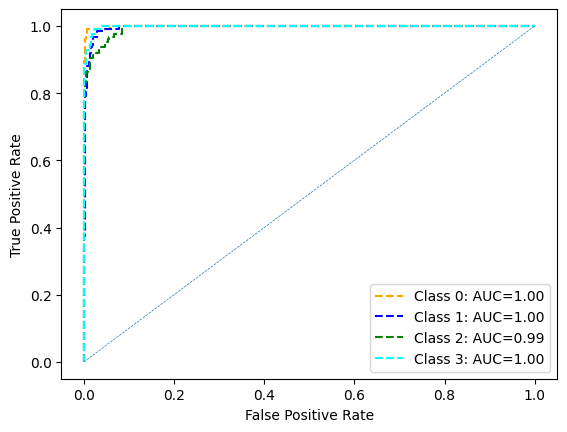

In [ ]:
CBC=CatBoostClassifier()
CB_result=evaluation_metrics(CBC,X_train, X_test, y_train, y_test)
print(CB_result)

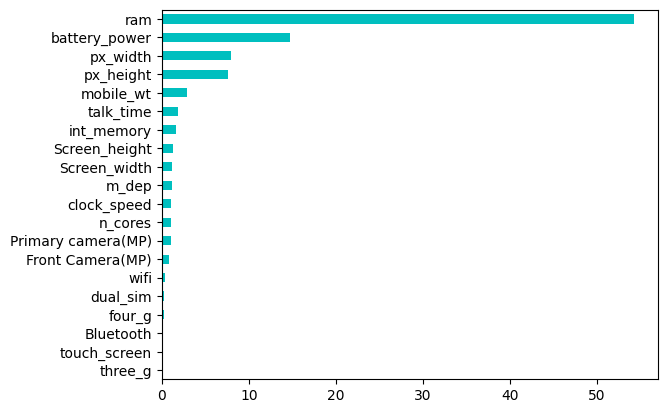

In [ ]:
features=pd.Series(CBC.feature_importances_,index= X.columns)
features.sort_values(inplace=True)
features.plot(kind="barh",color='c')
plt.show()

## **MODEL EXPLAINABILITY:**

# ELI5

In [ ]:
pip install eli5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107719 sha256=83e114a35a0b9ff65b03426688fac09b539f47481582d5275a8c0e2e5b8b32d4
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


In [ ]:
import eli5 as eli

In [ ]:
feature_names=list(X_test_shap.columns)

In [ ]:
eli.explain_weights(XGB,feature_names=feature_names)

Weight,Feature
0.3983,ram
0.1245,battery_power
0.0820,px_height
0.0798,px_width
0.0412,Bluetooth
0.0362,n_cores
0.0290,dual_sim
0.0266,m_dep
0.0231,mobile_wt
0.0216,Primary camera(MP)


In [ ]:
eli.show_prediction(XGB, X_test[0],
                    feature_names=feature_names,
                    show_feature_values=True)

## ***Future Work (Optional)***

The project can be further modelled using other latest classification algorithms like LightBGM classifier etc.

# **Comparision of all Classification Models**

In [ ]:
models=["DecisionTree","Tuned_DecisionTree","RandomForest","Tuned_randomTree","SVM","Tuned_SVM","GradientBoosting","Tuned GradientBoosting","XGB","Tuned XGB","KNN","Tuned KNN","Voting_Classifier","Stacking_classifier","Logistic_Regression","CatBoostClassifier"]

In [ ]:
Results=pd.concat([DC_result,DC_final_result,RF_result,RF_tuned_result,svm_result,SVM_final_result,GBC_result,GBC_final_result,XGB_result,XGB_final_result,KNN_result,KNN_final_result,VR_result,SR_result,LR_result,CB_result],axis=1)

In [ ]:
Results.columns=models

In [ ]:
Results.T.sort_values(by="Accuracy",ascending=False)

,Accuracy,Precision,Recall,F1-score
Tuned_SVM,0.972,0.972182,0.972,0.972038
Logistic_Regression,0.964,0.964280,0.964,0.964045
CatBoostClassifier,0.950,0.949923,0.950,0.949908
Stacking_classifier,0.934,0.934057,0.934,0.933935
Tuned XGB,0.932,0.932744,0.932,0.931941
XGB,0.924,0.924828,0.924,0.924258
Voting_Classifier,0.914,0.916185,0.914,0.914567
GradientBoosting,0.912,0.912493,0.912,0.912070
Tuned GradientBoosting,0.910,0.912622,0.910,0.910636
RandomForest,0.876,0.874944,0.876,0.875244


# **Conclusion**

Mobile phones come in all sorts of prices, features and specifications. Price estimation and prediction is an important part of consumer strategy. Deciding on the correct price of a product is very important for the market success of a product. A new product that has to be launched, must have the correct price so that consumers find it appropriate to buy the product. Based on all the features of mobile using the machine learning model the price range is predicted. In this project, different classification techniques are applied on the mobile price prediction dataset and results are compared. It is evident that out of all the mobile features, RAM, battery_power, pixel width and height are mainly responsible for the price of the mobile. Among of all the classifiers, the Tuned SVM provided the best accuracy of 97.2%.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***